# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_device_data.csv')
dataset.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

## Data Overview

In [ ]:
data = dataset.copy()

Shape of Dataset

In [ ]:
data.shape

(3454, 15)

Types of columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Brand_name, os, 4g, 5g are obejcts, Rest are int or float data types  

Checking duplicate values

In [ ]:
data.duplicated().sum()

0

Checking missing values

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
data.describe(include = 'all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp       3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory             3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram                    3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery                3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight                 3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year           3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
release_year             2013.0    2014.0    2015.5    2018.0    2020.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [ ]:
def plot_boxplot_histogram(data, column):
    """
    This function creates a boxplot and histogram for a given column in a DataFrame on the same scale.

    Parameters:
    data (DataFrame): The input DataFrame.
    column (str): The column to plot.

    Returns:
    None: Displays the plot.
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,  # Share the x-axis to align the scales
        gridspec_kw={"height_ratios": [0.20, 0.80]},  # Adjust height ratios to emphasize the histogram
        figsize=(8, 5)
    )

    # Boxplot
    sns.boxplot(data=data, x=column, ax=ax_box, showmeans=True, color = 'orange')
    ax_box.set(xlabel='')

    # Histogram
    sns.histplot(data=data, x=column, kde=False, ax=ax_hist)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_boxplot_histogram(data, 'column_name')

Distribution of normalized used device prices

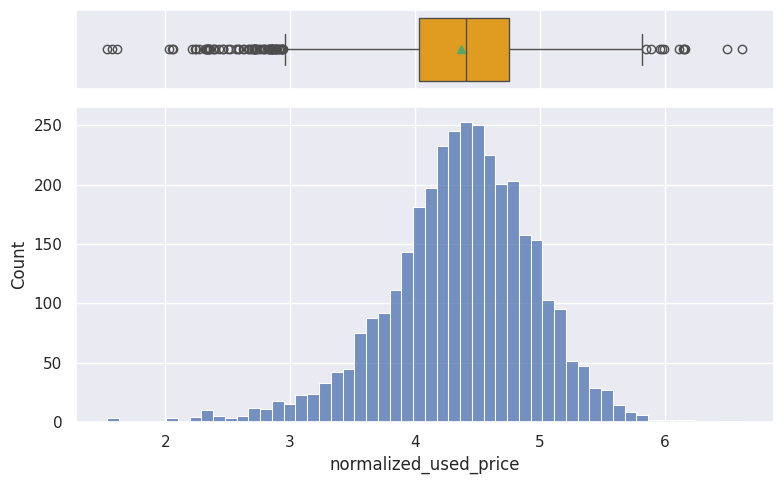

In [ ]:
plot_boxplot_histogram(data, 'normalized_used_price')

Observation: Distribution of normalized used device price looks almost normal with left side skewness

Normalized New Price

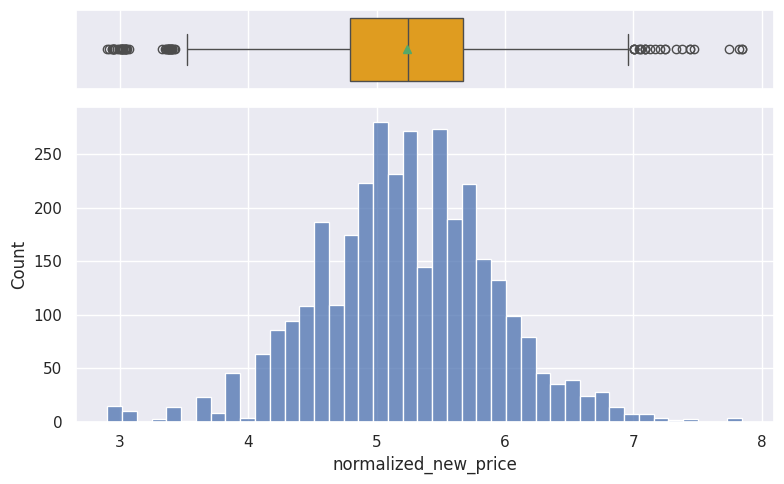

In [ ]:
plot_boxplot_histogram(data, 'normalized_new_price')

Observation: Distribution of normalized new device price is almost normal

Screen Size

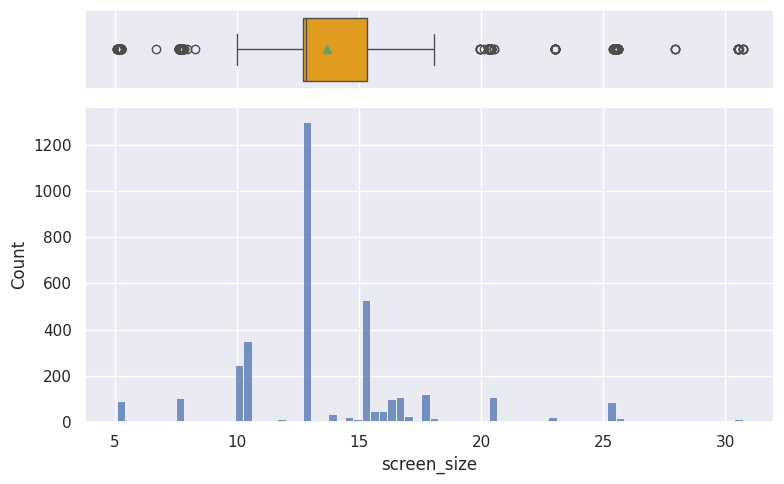

In [ ]:
plot_boxplot_histogram(data, 'screen_size')

Observation: Distribution of screen size does not follow any pattern, it has many outliers on both sides

Battery

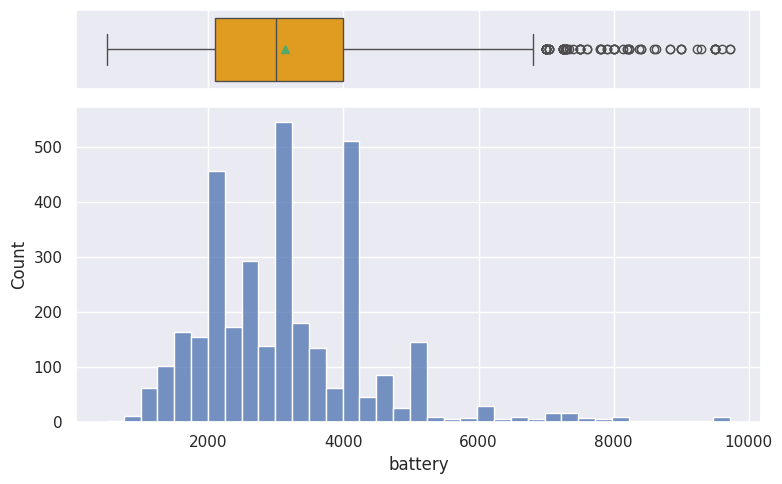

In [ ]:
plot_boxplot_histogram(data, 'battery')

Observation: Distribution of battery size does not follow any pattern. most of the batteries are in 2000~4000 range.

Weight

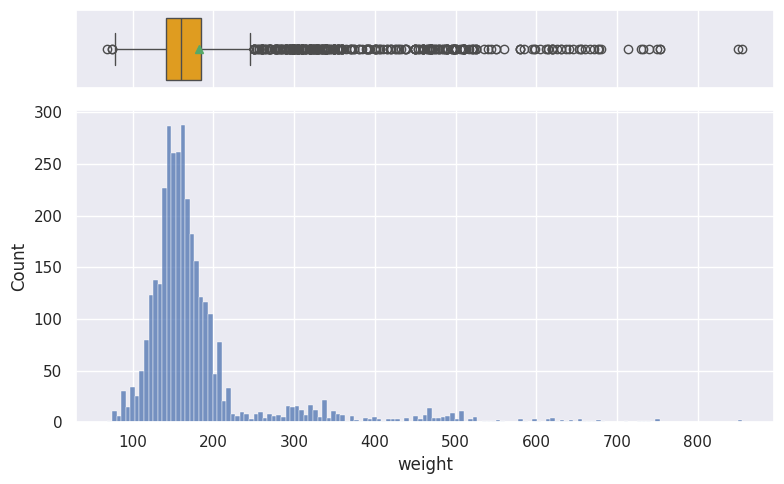

In [ ]:
plot_boxplot_histogram(data, 'weight')

Observation: Distribution of weight seems normal with huge skewness on right side

Int Memory

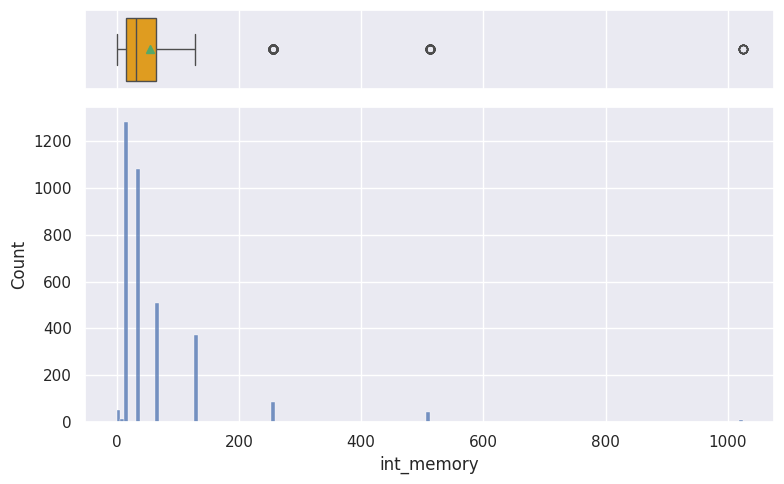

In [ ]:
plot_boxplot_histogram(data, 'int_memory')

Observation: Distribution of internal memory has no pattern.

RAM

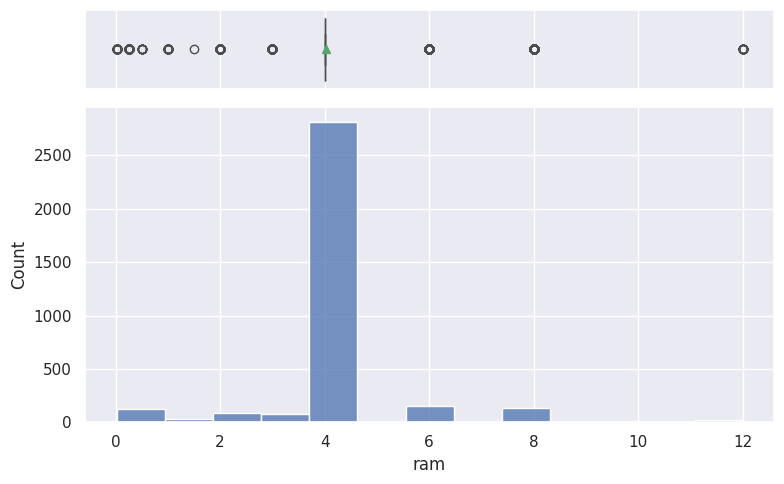

In [ ]:
plot_boxplot_histogram(data, 'ram')

Observation: Distribution of RAM has no pattern. 4 GB is average RAM.

Main Camera MP

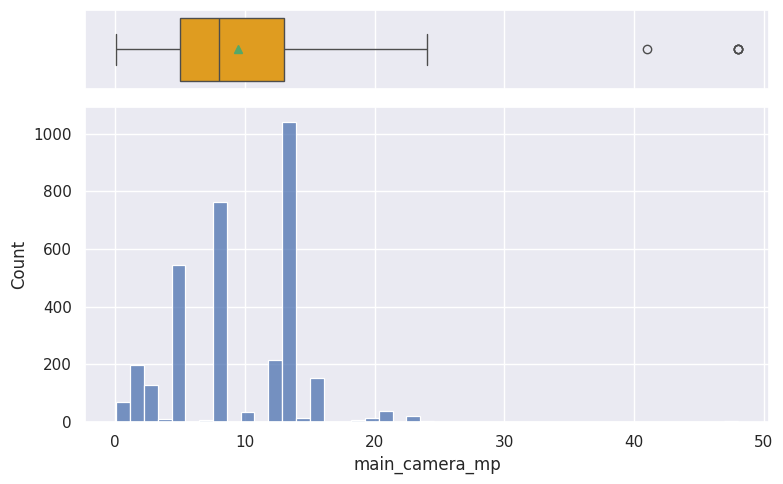

In [ ]:
plot_boxplot_histogram(data, 'main_camera_mp')

Observation: Distribution of main camera MP has no pattern, 8MP is average size.

Selfie Camera MP

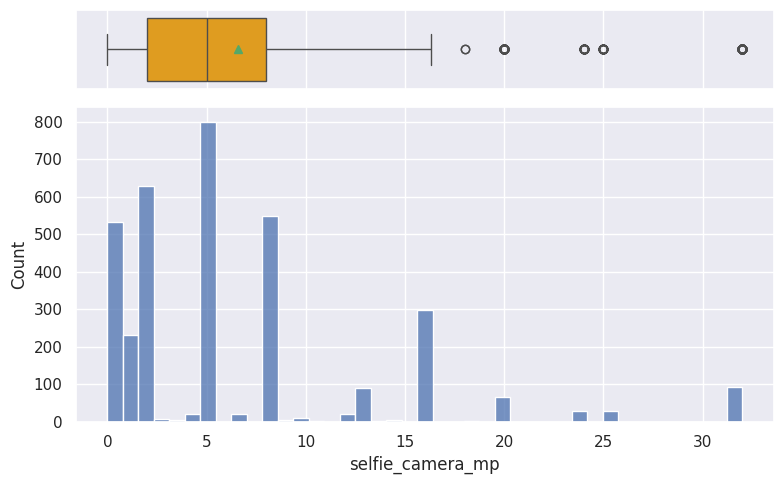

In [ ]:
plot_boxplot_histogram(data, 'selfie_camera_mp')

Observation: Distribution of selfie camera MP has no pattern, some high end mobiles have big selfie cameras.

Release Year

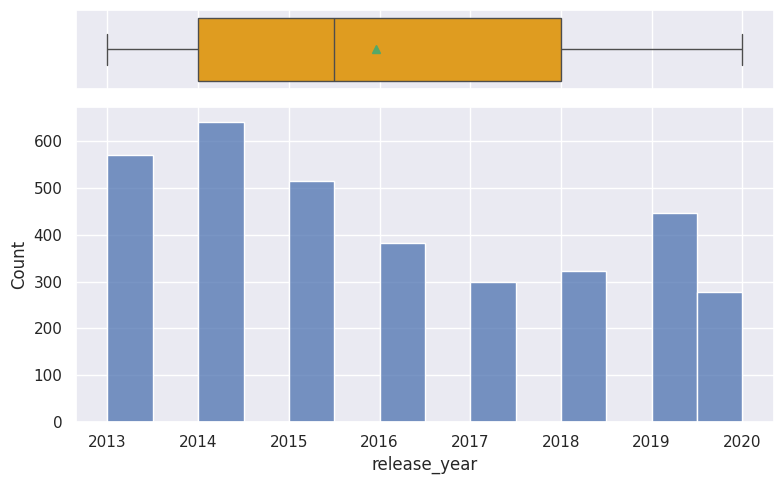

In [ ]:
plot_boxplot_histogram(data, 'release_year')

Observation: There was high sales in 2013 and 2014 then declined and again increased in 2019.

Days Used

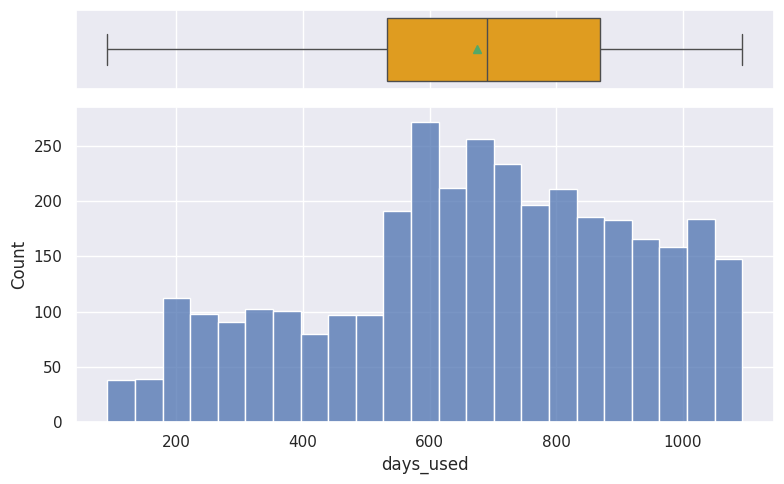

In [ ]:
plot_boxplot_histogram(data, 'days_used')

Observation: About 500 to 1000 days used mobiles are in high presence. Days used reduce the price, may be this is the reason.

OS

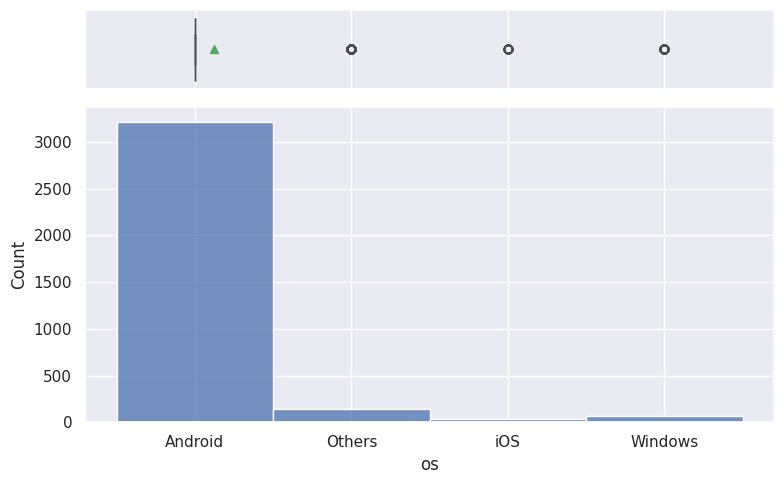

In [ ]:
plot_boxplot_histogram(data, 'os')

Observation: Market is highly dominated by Android devices, iOS is least preferred device.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hue,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

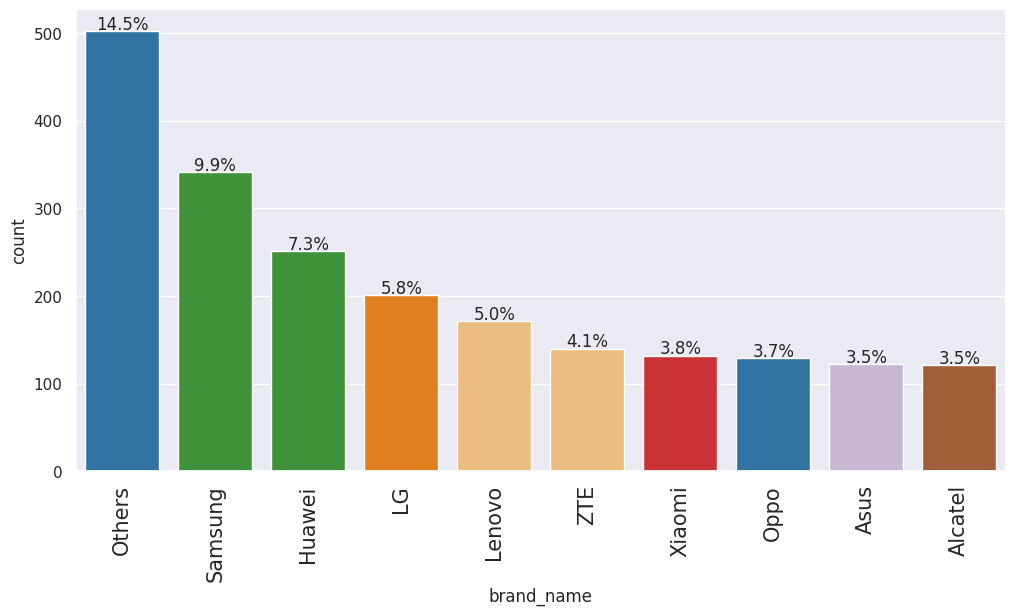

In [ ]:
labeled_barplot(data, 'brand_name', perc=True, n = 10, hue = 'brand_name')

Observation: Among major brands Samsung has highest presence followed by Huawei.

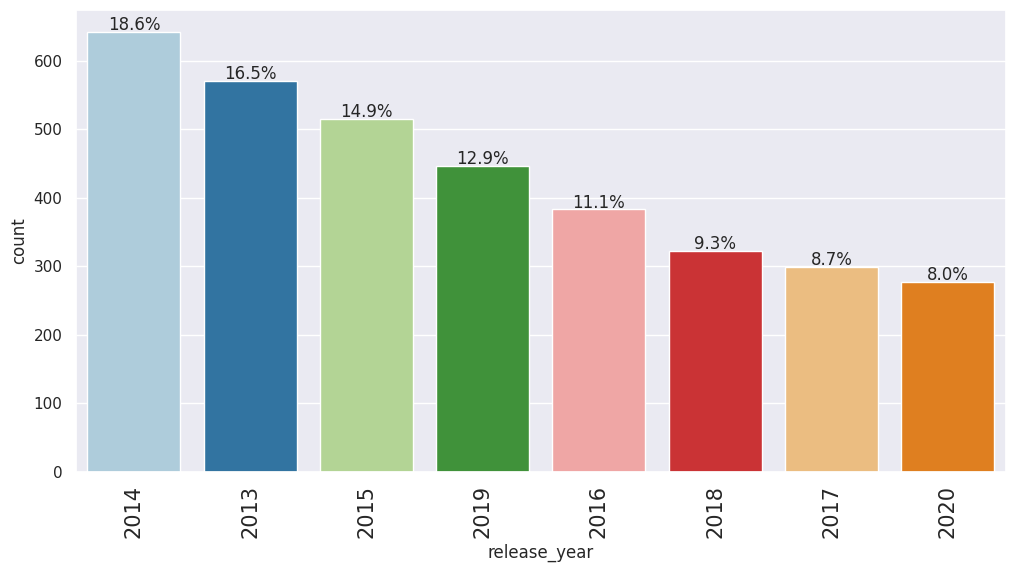

In [ ]:
labeled_barplot(data, 'release_year', perc = True, n = 10)

Observation: Sales continuously decreased from 2013 to 2020 except in 2014

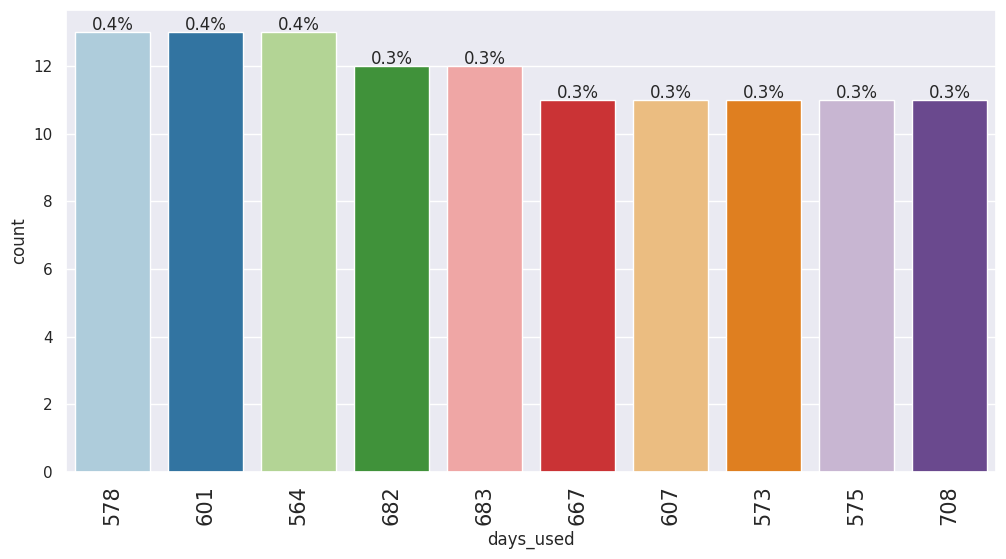

In [ ]:
labeled_barplot(data, 'days_used', perc = True, n = 10)

Observation: Normally devices are used for around 600 days.

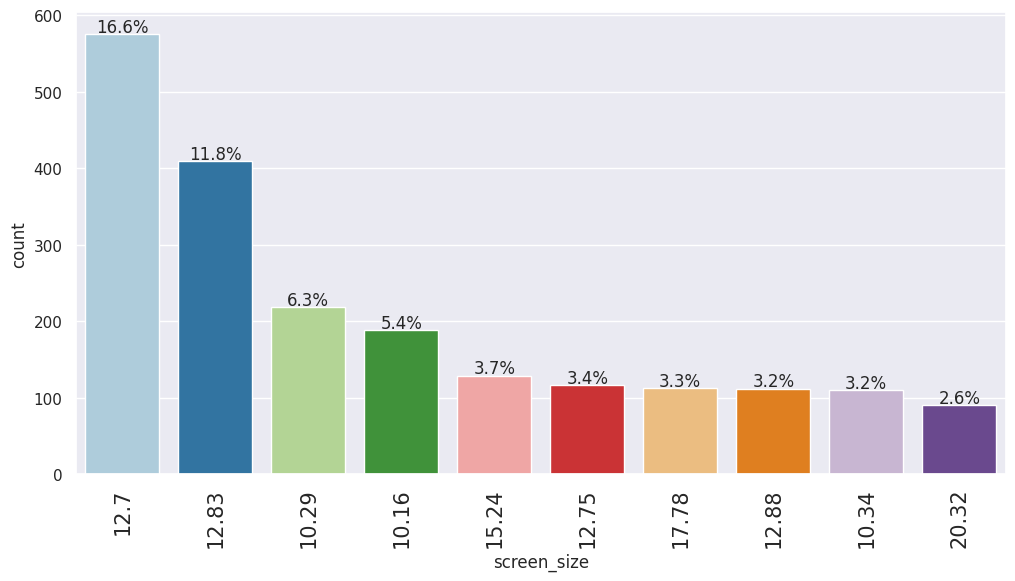

In [ ]:
labeled_barplot(data, 'screen_size', perc = True, n = 10)

Observation: 20.32cm is highest screen size, 12.7cm screen size are in high presence.

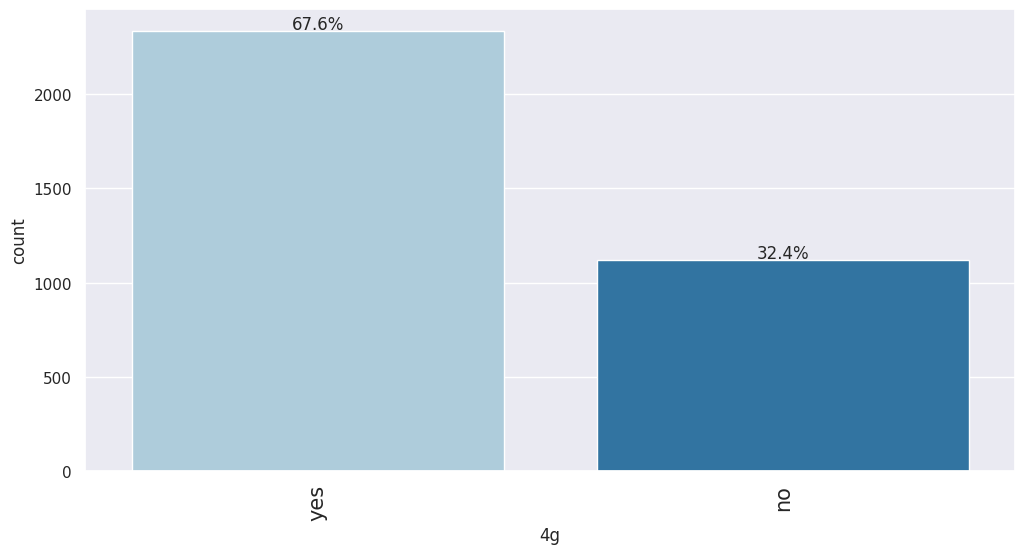

In [ ]:
labeled_barplot(data, '4g', perc= True, n = 10)

Observation: 4g devices are in high presence compared to not 4g devices.

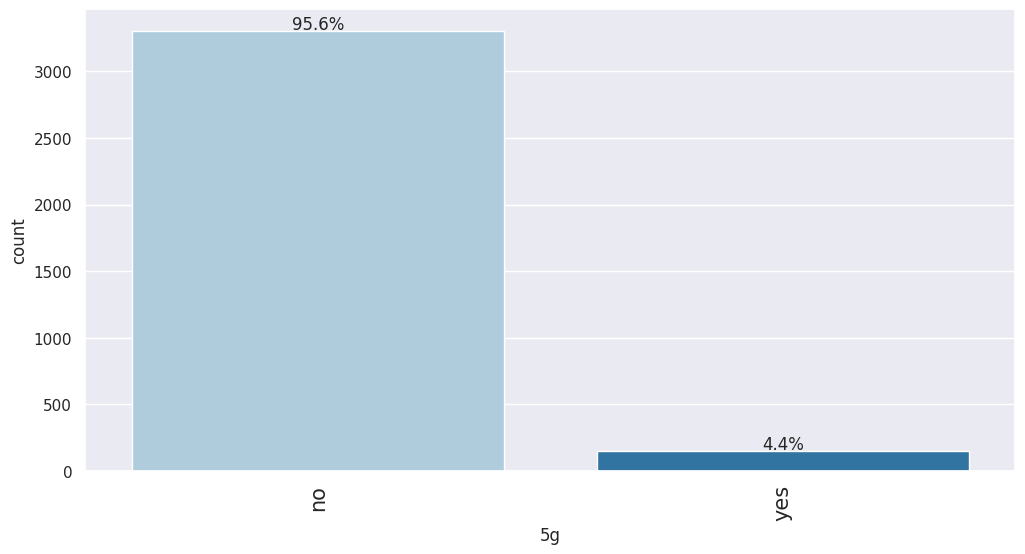

In [ ]:
labeled_barplot(data, '5g', perc= True,n = 10)

Observation: 5g devices are more in presence than 4g devices.

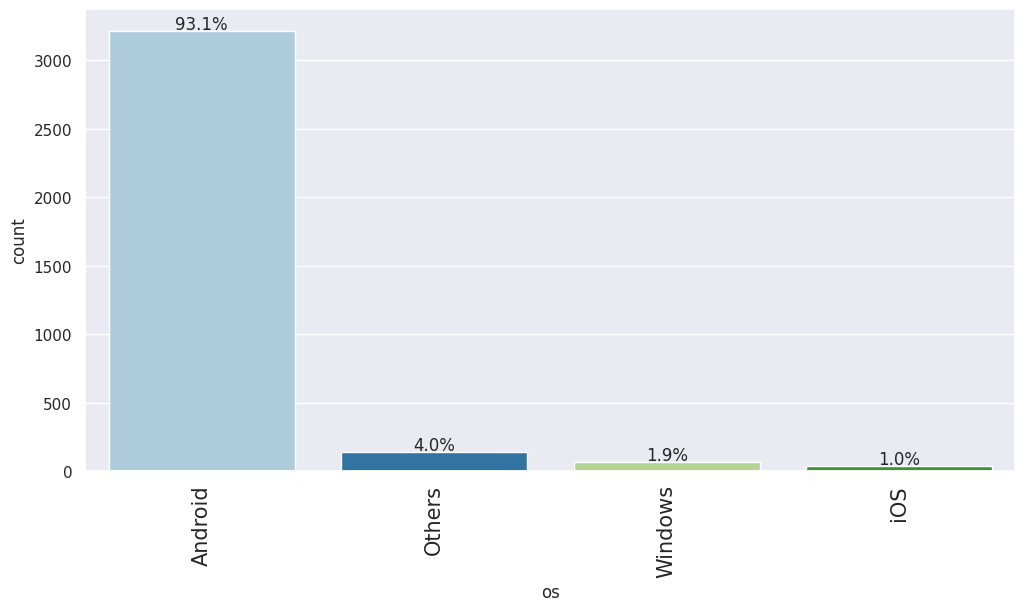

In [ ]:
labeled_barplot(data, 'os', perc = True, n = 10)

Observation: Recell market is dominated by Android devices, iOS shows least presence.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

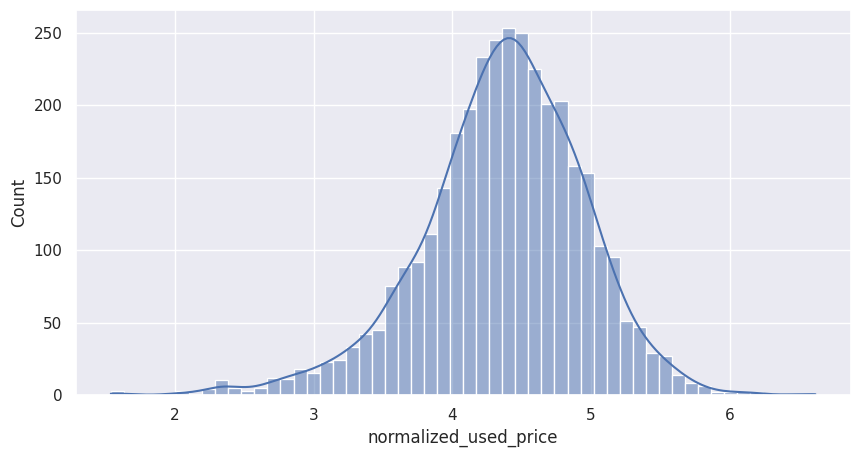

In [ ]:
# Distribution of normalized used device price
plt.figure(figsize = (10,5))
sns.histplot(x = 'normalized_used_price', data = data, kde = True)
plt.show()

Observation: Distribution of normalized used device price looks almost normal with left side skewness

### Percentage of the used device market is dominated by Android devices

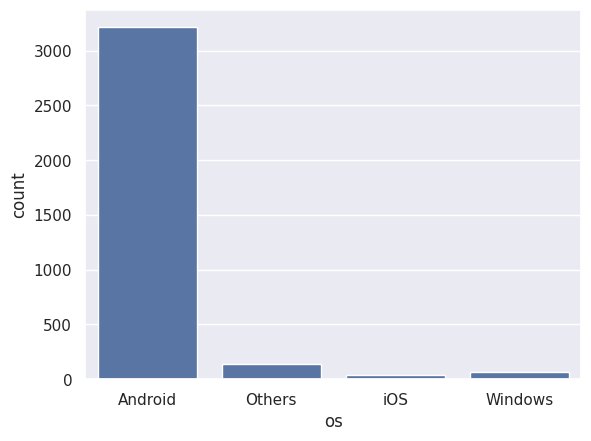

In [ ]:
sns.countplot(x = 'os', data = data)
plt.show()

In [ ]:
percenage_android = (data['os'].value_counts()['Android']/data.shape[0])*100
percenage_android

93.05153445280834

Observation: 93% Percentage of the used device market is dominated by Android devices

### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand

In [ ]:
data_brand = data.groupby('brand_name')['ram']
data_brand.describe()

count      mean       std   min   25%   50%  75%   max
brand_name                                                        
Acer         51.0  3.901961  0.500196  1.00  4.00  4.00  4.0   4.0
Alcatel     121.0  3.407025  1.263730  0.25  4.00  4.00  4.0   4.0
Apple        39.0  4.000000  0.606977  2.00  4.00  4.00  4.0   6.0
Asus        122.0  4.049180  0.600997  2.00  4.00  4.00  4.0   8.0
BlackBerry   22.0  3.829545  0.799503  0.25  4.00  4.00  4.0   4.0
Celkon       33.0  1.613636  1.831891  0.25  0.25  0.25  4.0   4.0
Coolpad      22.0  3.954545  0.213201  3.00  4.00  4.00  4.0   4.0
Gionee       56.0  3.933036  0.501115  0.25  4.00  4.00  4.0   4.0
Google       15.0  4.533333  0.915475  4.00  4.00  4.00  5.0   6.0
HTC         110.0  4.000000  0.331801  3.00  4.00  4.00  4.0   6.0
Honor       116.0  4.603448  1.625232  2.00  4.00  4.00  6.0   8.0
Huawei      251.0  4.655378  1.595387  0.25  4.00  4.00  4.0  12.0
Infinix      10.0  2.600000  0.843274  2.00  2.00  2.00  3.0   4.0
Karbonn      29.0  3.353448  1.441597  0.25  4.00  4.00  4.0   4.0
LG          201.0  3.936567  1.076461  0.25  4.00  4.00  4.0   8.0
Lava         36.0  3.277778  1.413933  0.25  4.00  4.00  4.0   4.0
Lenovo      171.0  3.885965  0.774222  0.25  4.00  4.00  4.0   6.0
Meizu        62.0  4.451613  1.223773  2.00  4.00  4.00  4.0   8.0
Micromax    117.0  3.679487  1.052934  0.25  4.00  4.00  4.0   4.0
Microsoft    22.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Motorola    106.0  3.943396  1.329735  2.00  4.00  4.00  4.0  12.0
Nokia       102.0  2.420294  1.889325  0.02  0.03  4.00  4.0   6.0
OnePlus      22.0  6.363636  2.592029  4.00  4.00  6.00  8.0  12.0
Oppo        129.0  4.961240  2.122804  1.00  4.00  4.00  6.0  12.0
Others      502.0  3.777888  1.015827  0.25  4.00  4.00  4.0   8.0
Panasonic    47.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Realme       41.0  4.195122  1.327018  2.00  3.00  4.00  6.0   6.0
Samsung     341.0  4.199413  1.377140  0.25  4.00  4.00  4.0  12.0
Sony         86.0  4.069767  0.479968  4.00  4.00  4.00  4.0   8.0
Spice        30.0  3.750000  0.951405  0.25  4.00  4.00  4.0   4.0
Vivo        117.0  4.756410  1.638196  0.50  4.00  4.00  4.0   8.0
XOLO         49.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Xiaomi      132.0  4.583333  1.508458  2.00  4.00  4.00  4.0  12.0
ZTE         140.0  4.023214  0.909530  0.25  4.00  4.00  4.0   8.0

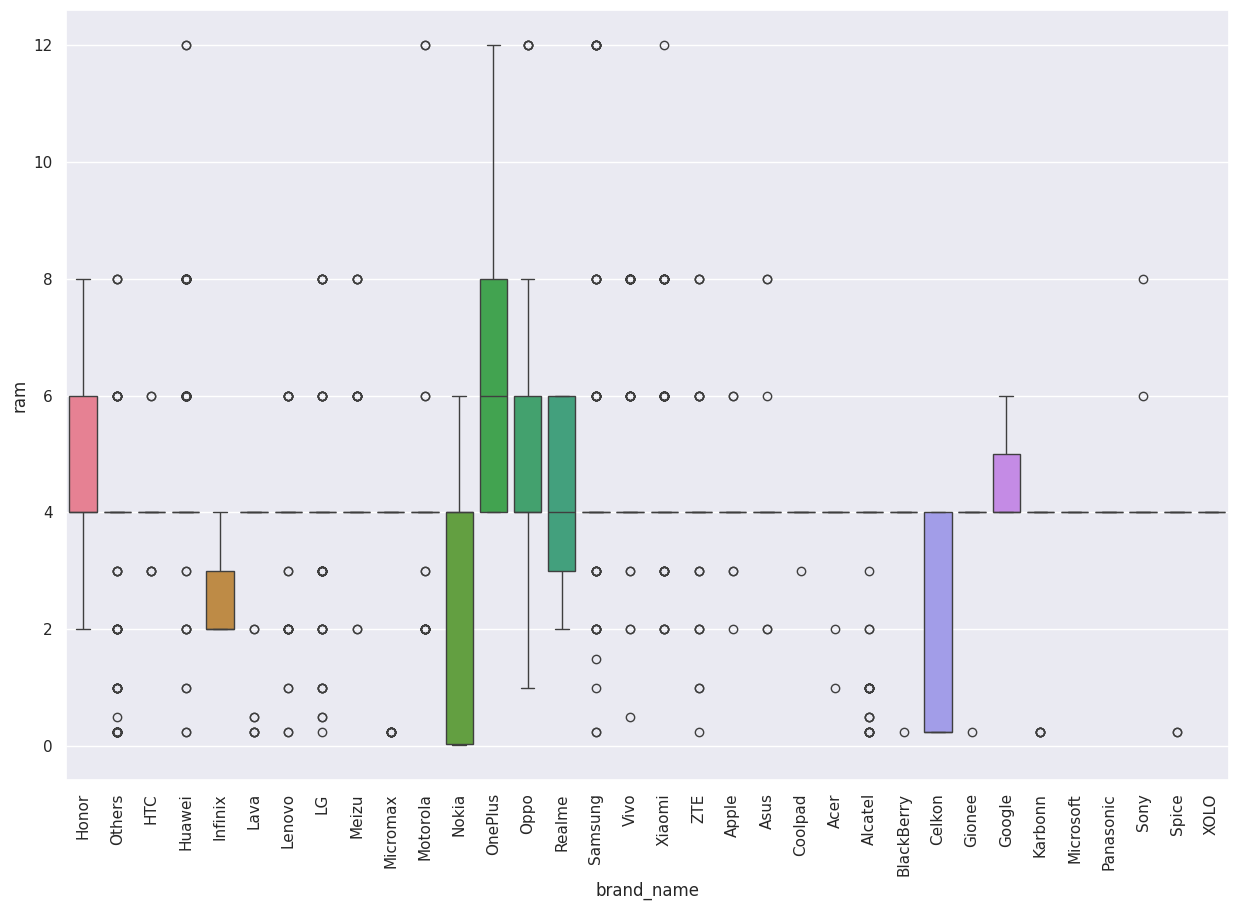

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'brand_name', y = 'ram', data = data, hue = 'brand_name')
plt.xticks(rotation = 90)
plt.show()

Observation: 4GB is median RAM and Oneplus, Opps and Realme provide wide range while Nokian and Geikon, Google and Karbonn are least in rams. There are significant outliers across several brands.

In [ ]:
# Analyze large battery brand names
data_battery = data.groupby('brand_name')['battery']
data_battery.describe()

count         mean          std     min     25%     50%     75%  \
brand_name                                                                    
Acer         51.0  2999.607843  1340.678501  1300.0  2000.0  2700.0  3850.0   
Alcatel     121.0  2452.975207   864.473486   750.0  1800.0  2500.0  3000.0   
Apple        39.0  4628.910256  2638.294809  1510.0  2674.5  3937.0  6888.0   
Asus        122.0  3499.836066  1171.116218  1170.0  2865.0  3300.0  4000.0   
BlackBerry   22.0  2822.500000   746.231405  1450.0  2260.0  2840.0  3440.0   
Celkon       33.0  1475.757576   315.268044  1200.0  1400.0  1400.0  1400.0   
Coolpad      22.0  2945.000000   761.719546  1800.0  2500.0  2650.0  3800.0   
Gionee       56.0  3117.946429  1328.958504  1500.0  2000.0  3000.0  4000.0   
Google       15.0  3628.333333  1600.524096  2700.0  2857.5  3430.0  3700.0   
HTC         110.0  2614.454545   708.433582  1230.0  2100.0  2600.0  2840.0   
Honor       116.0  3690.517241   881.777695  1730.0  3020.0  3750.0  4000.0   
Huawei      251.0  3745.159363  1315.355684  1350.0  3000.0  4000.0  4200.0   
Infinix      10.0  4800.000000   788.810638  4000.0  4000.0  5000.0  5000.0   
Karbonn      29.0  1724.137931   219.423225  1350.0  1625.0  1625.0  2000.0   
LG          201.0  3033.980100  1165.156140   950.0  2300.0  3000.0  3500.0   
Lava         36.0  2248.611111   639.996218  1400.0  1912.5  2000.0  2690.0   
Lenovo      171.0  3618.479532  1632.362425  1300.0  2355.0  3450.0  4025.0   
Meizu        59.0  3368.220339   523.260470  2400.0  3060.0  3150.0  3600.0   
Micromax    117.0  2224.786325   665.922485  1200.0  1800.0  2000.0  2500.0   
Microsoft    21.0  2382.380952   646.650251  1500.0  1905.0  2500.0  3000.0   
Motorola    106.0  3312.594340   906.572360  1785.0  2632.5  3000.0  4000.0   
Nokia       104.0  2259.615385  1079.475712  1000.0  1200.0  2000.0  3015.0   
OnePlus      22.0  3716.590909   497.013429  2525.0  3300.0  3800.0  4085.0   
Oppo        129.0  3380.581395   850.842098  1700.0  2850.0  3600.0  4025.0   
Others      502.0  2821.952191  1224.096952   620.0  2000.0  2500.0  3150.0   
Panasonic    47.0  2682.978723   775.914369  1300.0  2050.0  2500.0  3000.0   
Realme       41.0  4337.317073   473.690428  3410.0  4000.0  4200.0  5000.0   
Samsung     341.0  3362.683284  1690.287628   800.0  2200.0  3000.0  4000.0   
Sony         86.0  3003.372093   960.065697  1700.0  2375.0  2870.0  3200.0   
Spice        30.0  2191.000000  1074.684717  1300.0  1762.5  2100.0  2100.0   
Vivo        117.0  3718.846154   825.406740  1900.0  3250.0  3900.0  4500.0   
XOLO         49.0  2220.000000   679.589337  1400.0  1800.0  2100.0  2500.0   
Xiaomi      132.0  3979.848485   986.505116  2000.0  3120.0  4000.0  4500.0   
ZTE         140.0  2894.821429   931.839561   500.0  2200.0  2975.0  3212.5   

               max  
brand_name          
Acer        7300.0  
Alcatel     4600.0  
Apple       9720.0  
Asus        7800.0  
BlackBerry  4000.0  
Celkon      3000.0  
Coolpad     4070.0  
Gionee      7000.0  
Google      9240.0  
HTC         6700.0  
Honor       7250.0  
Huawei      7500.0  
Infinix     6000.0  
Karbonn     2300.0  
LG          8200.0  
Lava        4000.0  
Lenovo      9600.0  
Meizu       4500.0  
Micromax    4800.0  
Microsoft   3340.0  
Motorola    5000.0  
Nokia       5300.0  
OnePlus     4300.0  
Oppo        5000.0  
Others      9000.0  
Panasonic   5000.0  
Realme      5000.0  
Samsung     9500.0  
Sony        6000.0  
Spice       7600.0  
Vivo        5000.0  
XOLO        4100.0  
Xiaomi      8620.0  
ZTE         5100.0

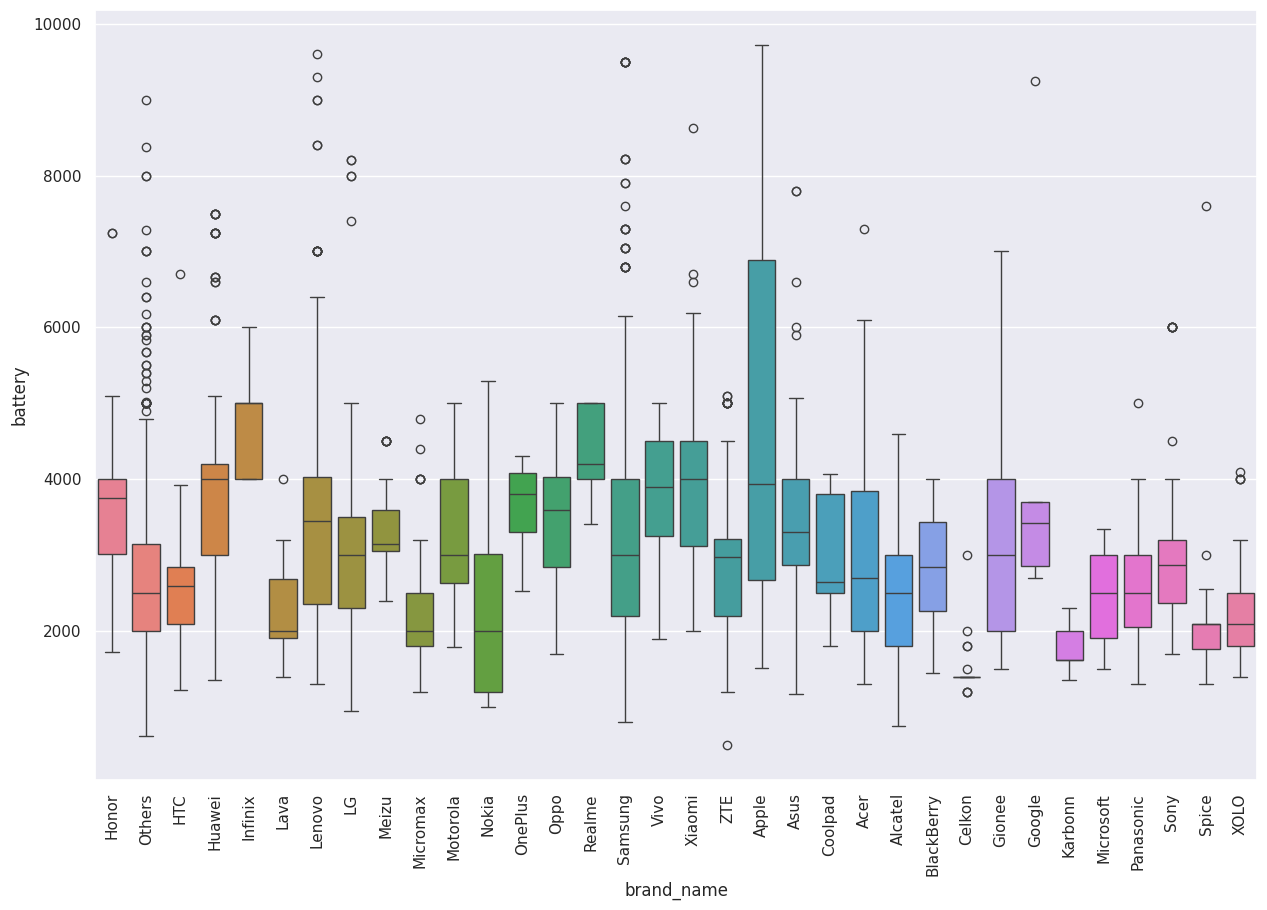

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'brand_name', y = 'battery', data = data, hue  = 'brand_name')
plt.xticks(rotation = 90)
plt.show()

Observation: Large Battery Brands: Apple, Infinix, and Realme lead the pack in terms of offering devices with high battery capacities, possibly targeting users looking for long battery life.

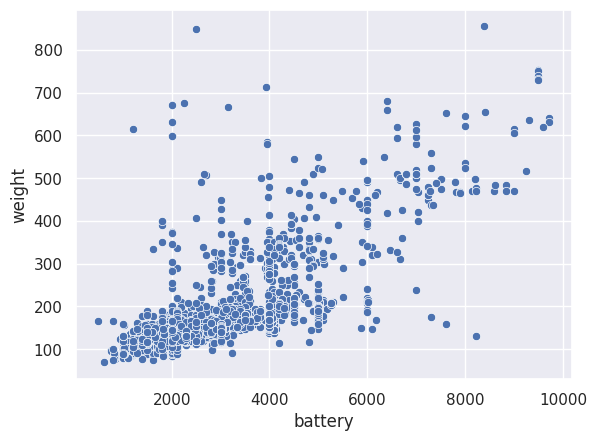

In [ ]:
sns.scatterplot(x = 'battery', y = 'weight', data = data)
plt.show()

Observation: There is almost linear relationship between battery size greater than 4500mah  and weight with some outliers

In [ ]:
# screen sizes with greater than 6 inch
screen_greater_6 = data[data['screen_size']>6*2.54]
print(screen_greater_6['brand_name'].value_counts())
print("Phones haing screen size greater than 6 inch are :", screen_greater_6.value_counts().sum())

brand_name
Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: count, dtype: int64
Phones haing screen size greater than 6 inch are : 928


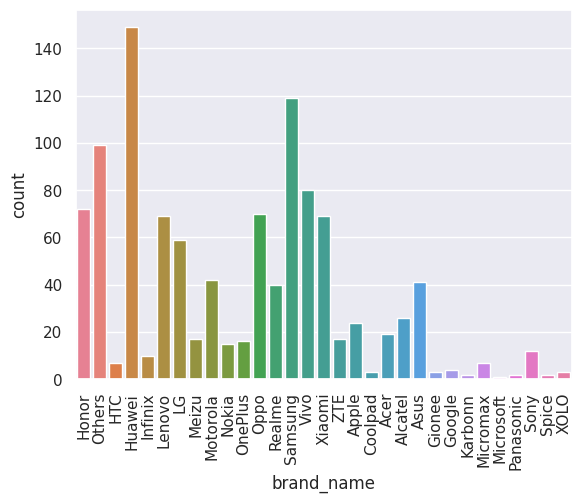

In [ ]:
sns.countplot(data = screen_greater_6, x = 'brand_name', hue  = 'brand_name')
plt.xticks(rotation = 90)
plt.show()

* Devices having screen size greater than 6 inch are : 928
* Huawei and Samsung devices with more than 6 inch sizes are in high presence.

In [ ]:
# Devices with greater than 8mp camera
devices_greater_8mp = data[data['selfie_camera_mp']>8]
print(devices_greater_8mp['brand_name'].value_counts())
print(devices_greater_8mp['brand_name'].value_counts().sum())

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: count, dtype: int64
655


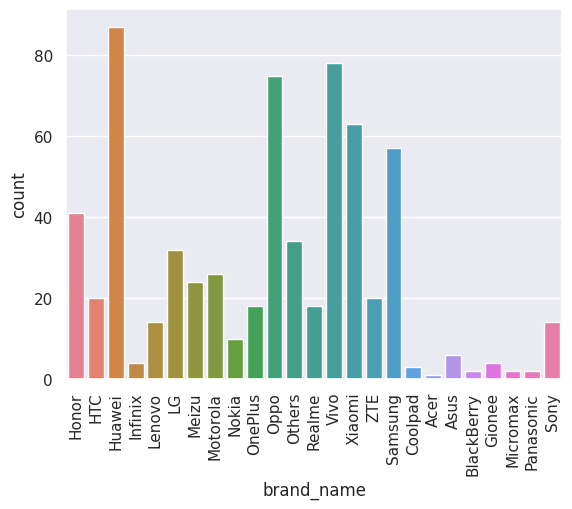

In [ ]:
sns.countplot(x = 'brand_name', data = devices_greater_8mp, hue = 'brand_name')
plt.xticks(rotation = 90)
plt.show()

* Devices with greater than 8mp selfie camera are 535
* Huawei tops the list followed by Vivo and Oppo

### Bivarite Analysis

### Correlation of Normalized Used Price with other factors

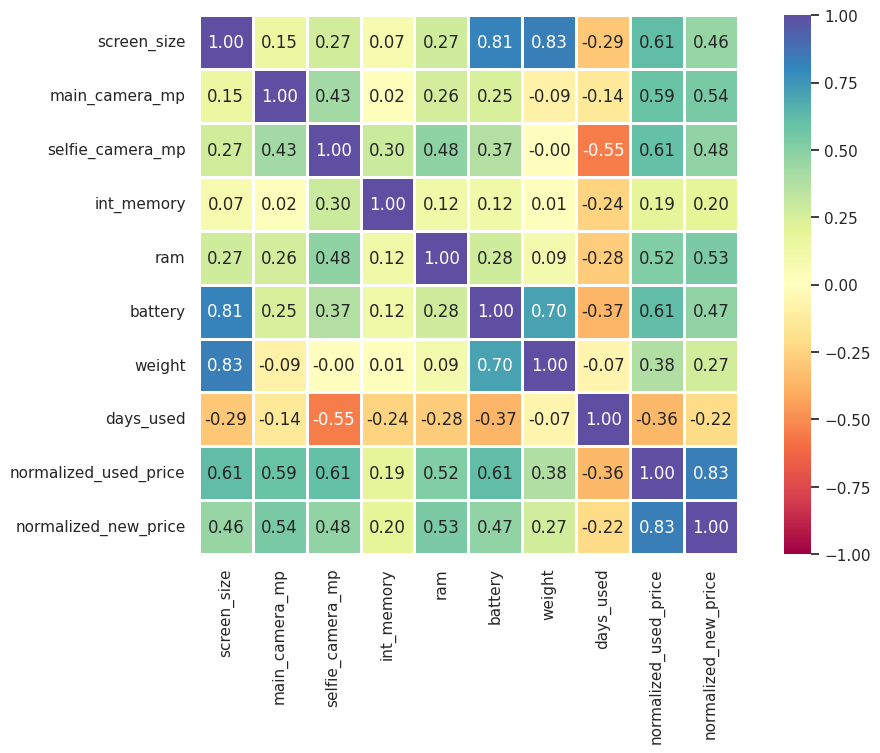

In [ ]:
num_cols = list(data.select_dtypes(include=['number']).columns)  # Automatically select numeric columns
num_cols.remove('release_year')
numeric_data = data[num_cols]
correlated_features = numeric_data.corr()
plt.figure(figsize = (12,7))
sns.heatmap(correlated_features, annot=True, fmt=".2f", cmap="Spectral",
                vmin=-1, vmax=1, center=0, linewidths=2, linecolor='white', square=True)
plt.show()

Observations:
* Strong positive correlation (0.83): As the normalized new price increases, the normalized used price also increases significantly.
* Moderate positive correlation (0.61): Phones with higher selfie camera megapixels tend to have higher used prices.
* Moderate positive correlation (0.59): Phones with better main camera megapixels are associated with higher used prices.
* Moderate positive correlation (0.61): Larger screen sizes generally correspond to higher used prices.
* Moderate positive correlation (0.61): Phones with better battery capacity tend to have higher used prices.
* Moderate positive correlation (0.52): More RAM generally results in higher used prices, indicating better performance hardware increases value.
* Negative correlation (-0.36): As the number of days a phone is used increases, the used price decreases, reflecting typical depreciation over time.

In [ ]:
num_cols_data = data.select_dtypes(include=['number']).columns  # Automatically select numeric columns
numeric_data = data[num_cols_data]
numeric_data.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  normalized_used_price  \
0   146.0          2020        127               4.307572   
1   213.0          2020        325               5.162097   
2   213.0          2020        162               5.111084   
3   480.0          2020        345               5.135387   
4   185.0          2020        293               4.389995   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837

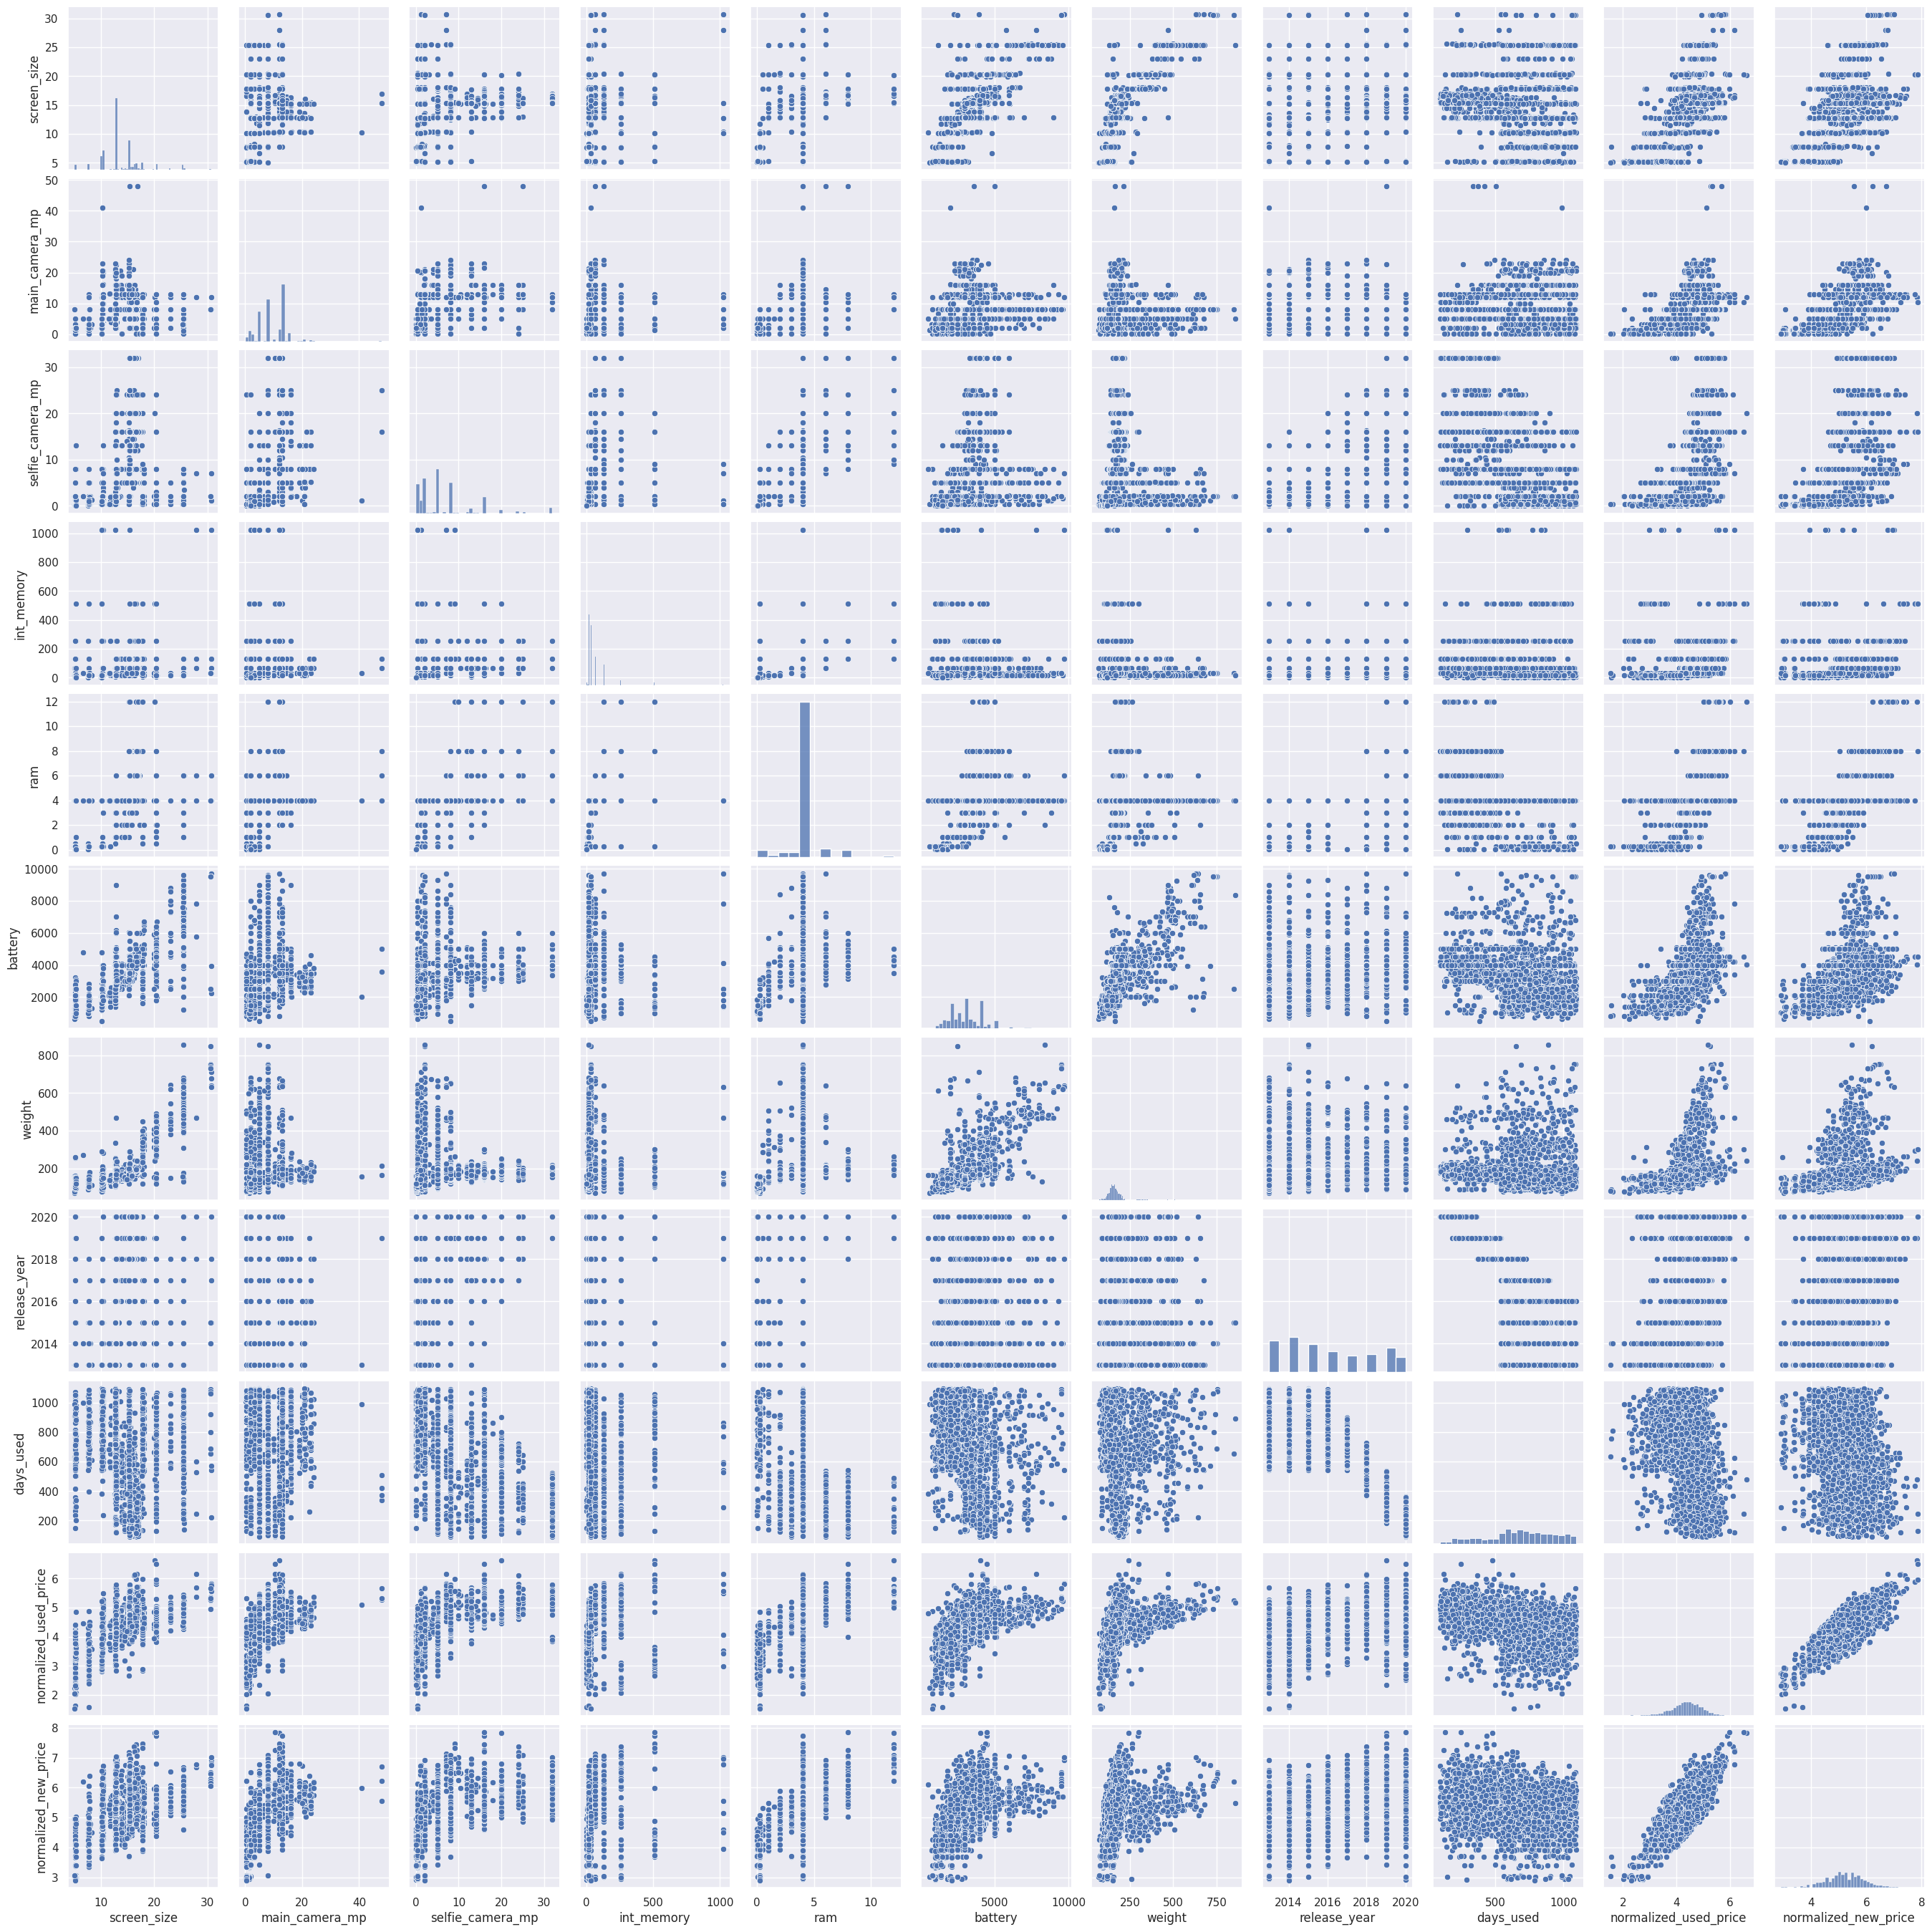

In [ ]:
sns.pairplot(numeric_data)
plt.show()

Observations:
* Screen size has highest correlation with weight and battery.
* Screen size, camera specs (both main and selfie), RAM, and battery are key factors positively influencing both new and used prices.
* Days used and release year have a negative effect on the normalized used price, as expected, indicating depreciation with time and use.
* There are some outliers that might need further exploration to understand whether they represent premium models or possible data anomalies.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data1 = data.copy()

In [ ]:
data1.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

* Missing Value Treatment

In [ ]:
data1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

columns_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight"
]

# Loop through each column and fill missing values with the median based on groups
for column in columns_to_fill:
    data1[column] = data1.groupby(['release_year', 'brand_name'])[column].transform(
        lambda x: x.fillna(x.median())
    )

In [ ]:
data1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
columns_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight"
]

# Loop through each column and fill missing values with the median based on groups
for column in columns_to_fill:
    data1[column] = data1.groupby(['brand_name'])[column].transform(
        lambda x: x.fillna(x.median())
    )

In [ ]:
data1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
data1['main_camera_mp'] = data1['main_camera_mp'].fillna(data1['main_camera_mp'].median())

In [ ]:
data1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* Feature Engineering : Change release year to years since release

In [ ]:
data1.shape

(3454, 15)

In [ ]:
data1['years_since_release'] = 2021 - data1['release_year']
data1.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  years_since_release  
0        127               4.307572              4.715100                    1  
1        325               5.162097              5.519018                    1  
2        162               5.111084              5.884631                    1  
3        345               5.135387              5.630961                    1  
4        293               4.389995              4.947837                    1

In [ ]:
data1.shape

(3454, 16)

In [ ]:
data1.drop('release_year', axis = 1, inplace = True)

* Outlier detection and treatment

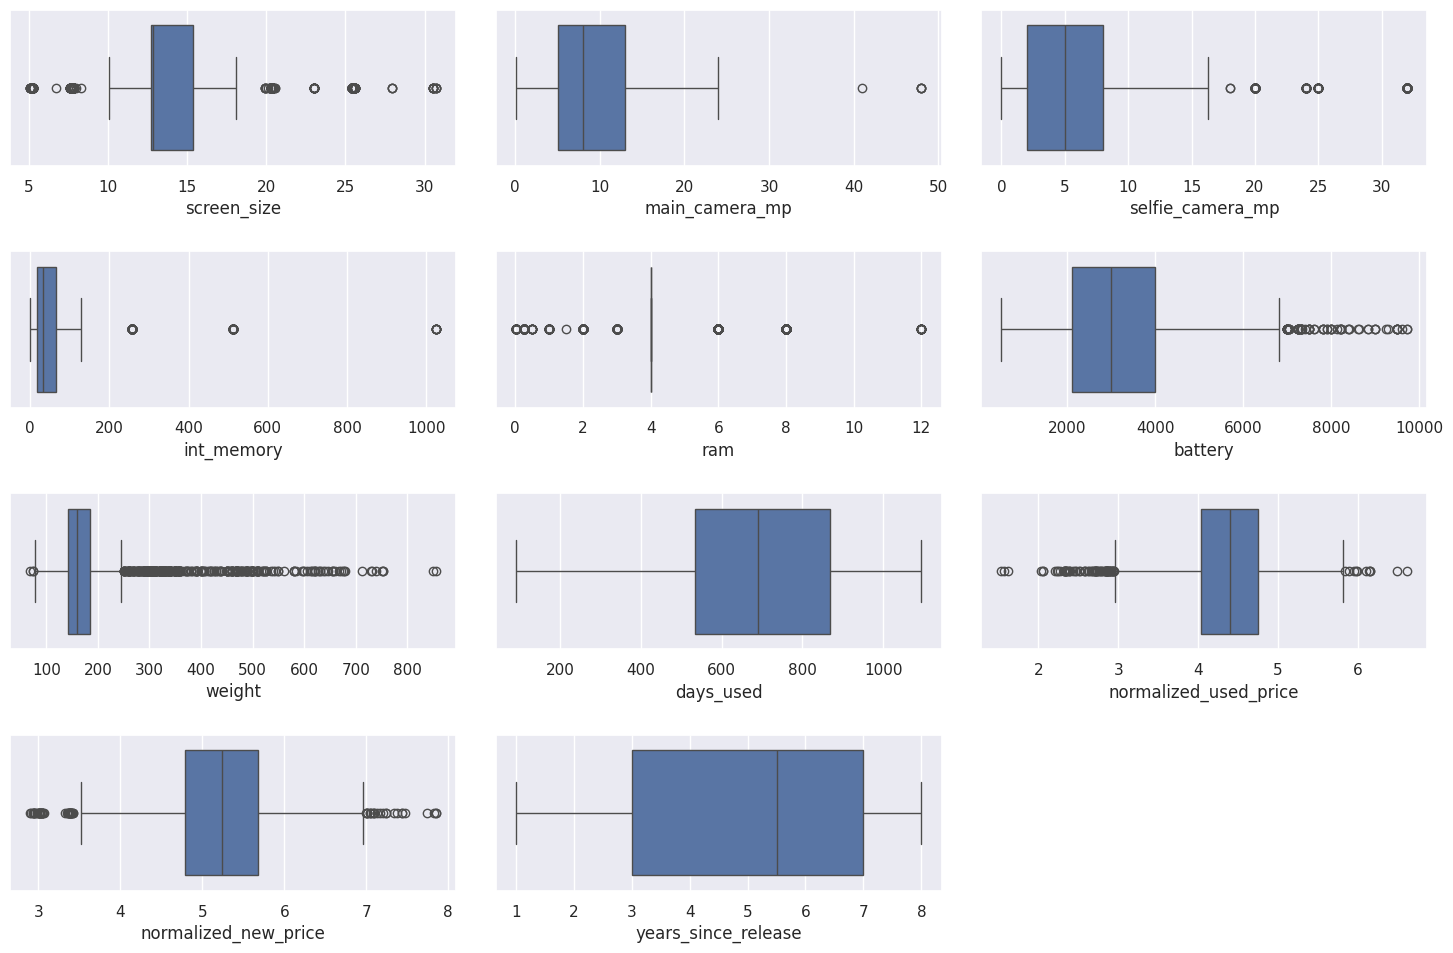

In [ ]:
num_cols2 = data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols2):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* Outliers: Most variables have outliers, especially in terms of internal memory, battery, weight, and screen size. These outliers typically represent high-end models with advanced features or devices. Its not wise to delete these outliers.
* Central Tendency: Many of the boxplots suggest that most of the dataset's phones fall into typical ranges (e.g., 5-15 cm screens, around 64-256 GB memory, 4 GB RAM, 2100-4000 mAh batteries), but outliers suggest the presence of newer, premium models with higher specifications.
* Depreciation: There is a reasonable range for normalized used prices, with most phones experiencing depreciation over time. However, certain devices maintain high resale values.

## EDA After Manipulating Data

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
def plot_boxplot_histogram(data1, column):
    """
    This function creates a boxplot and histogram for a given column in a DataFrame on the same scale.

    Parameters:
    data (DataFrame): The input DataFrame.
    column (str): The column to plot.

    Returns:
    None: Displays the plot.
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,  # Share the x-axis to align the scales
        gridspec_kw={"height_ratios": [0.15, 0.85]},  # Adjust height ratios to emphasize the histogram
        figsize=(10, 6)
    )

    # Boxplot
    sns.boxplot(data=data1, x=column, ax=ax_box, showmeans=True)
    ax_box.set(xlabel='')

    # Histogram
    sns.histplot(data=data1, x=column, kde=False, ax=ax_hist)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_boxplot_histogram(data, 'column_name')

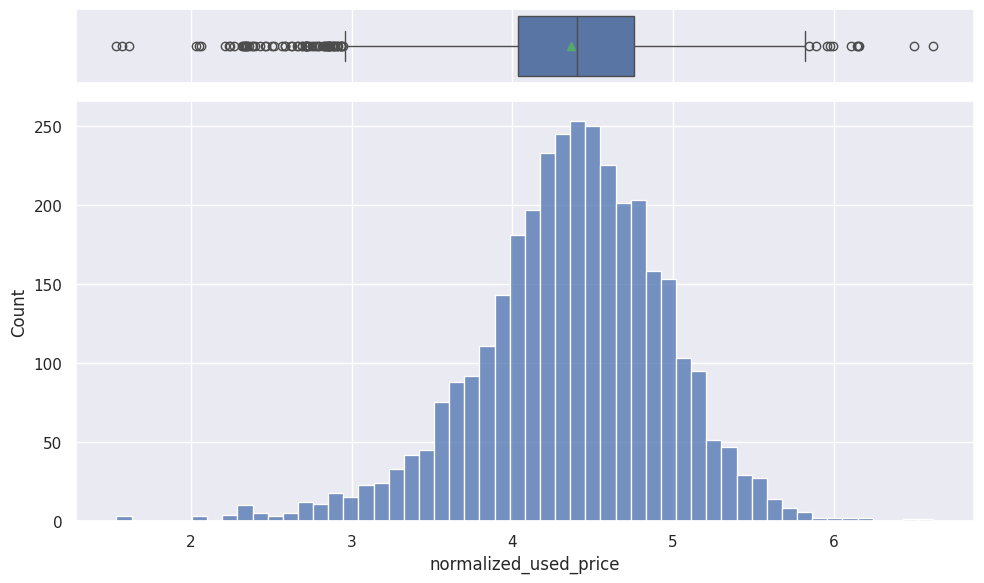

In [ ]:
plot_boxplot_histogram(data1, 'normalized_used_price')

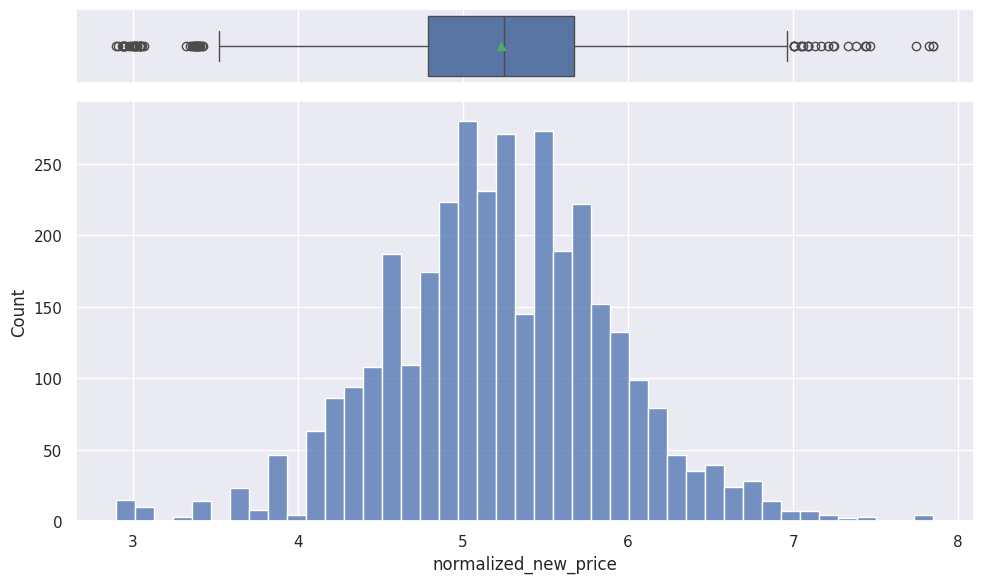

In [ ]:
plot_boxplot_histogram(data1, 'normalized_new_price')

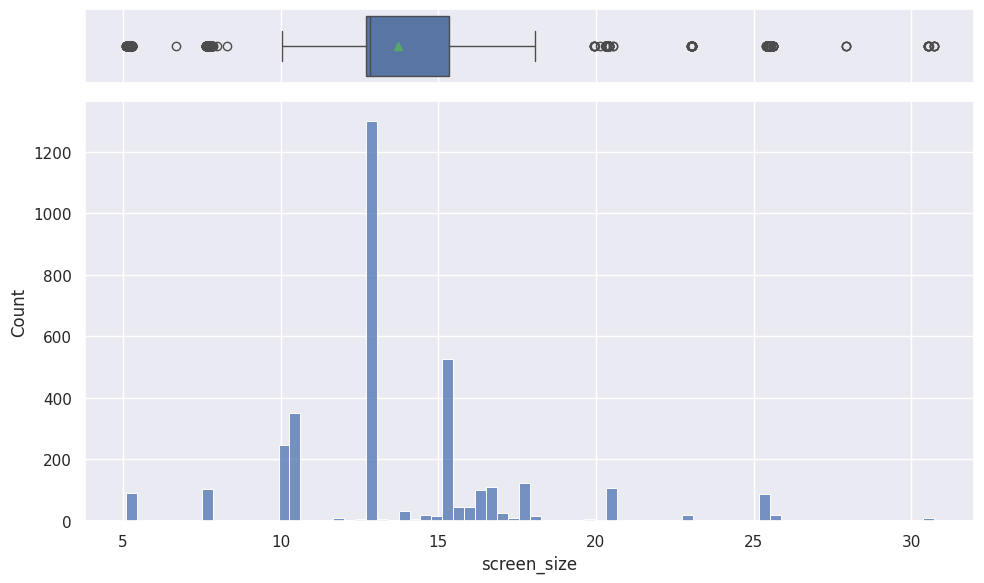

In [ ]:
plot_boxplot_histogram(data1, 'screen_size')

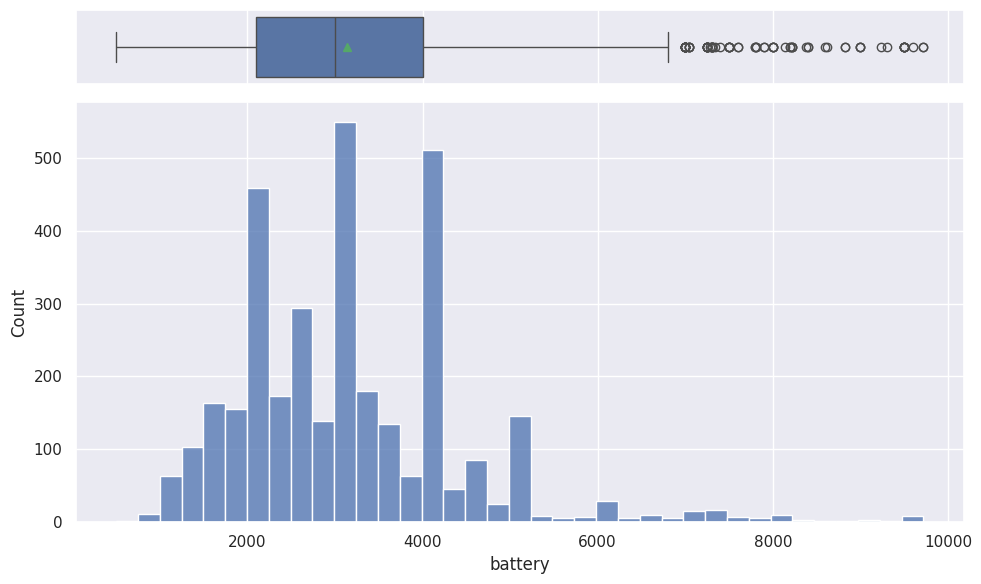

In [ ]:
plot_boxplot_histogram(data1, 'battery')

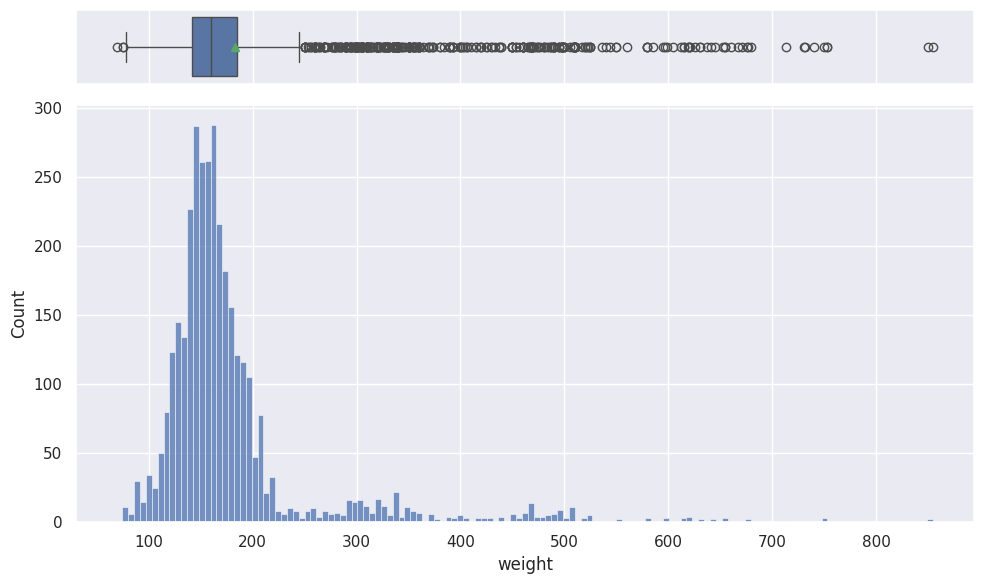

In [ ]:
plot_boxplot_histogram(data1, 'weight')

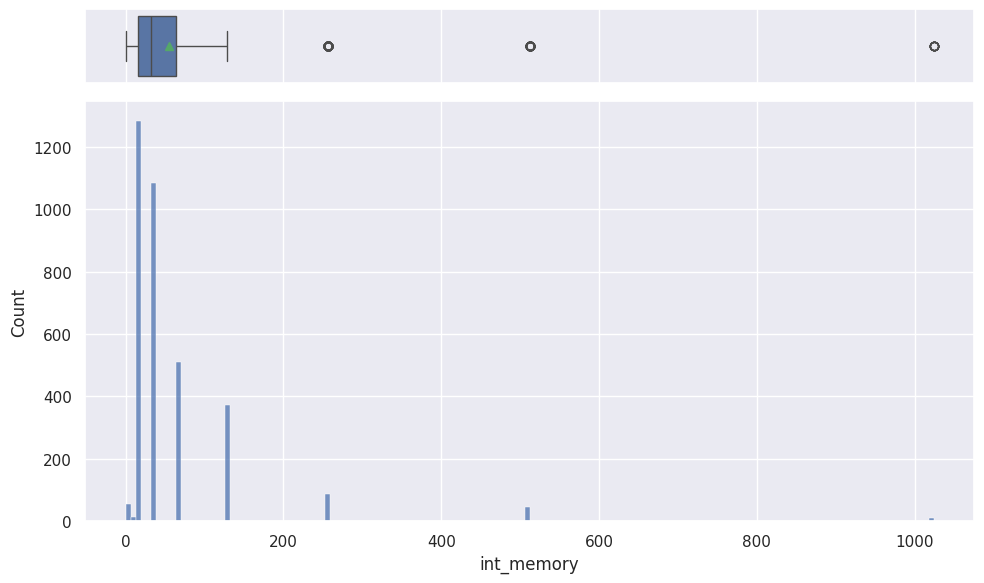

In [ ]:
plot_boxplot_histogram(data1, 'int_memory')

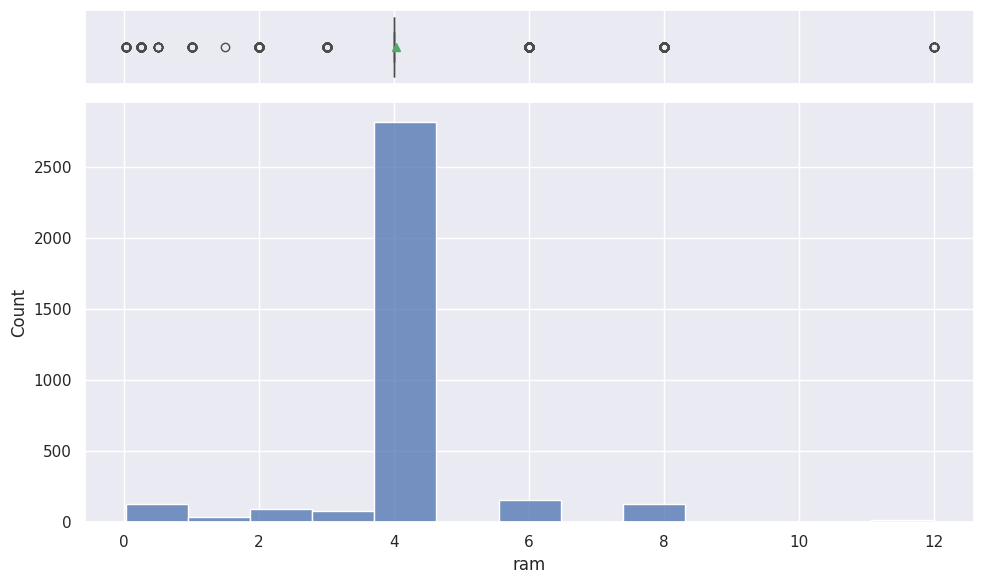

In [ ]:
plot_boxplot_histogram(data1, 'ram')

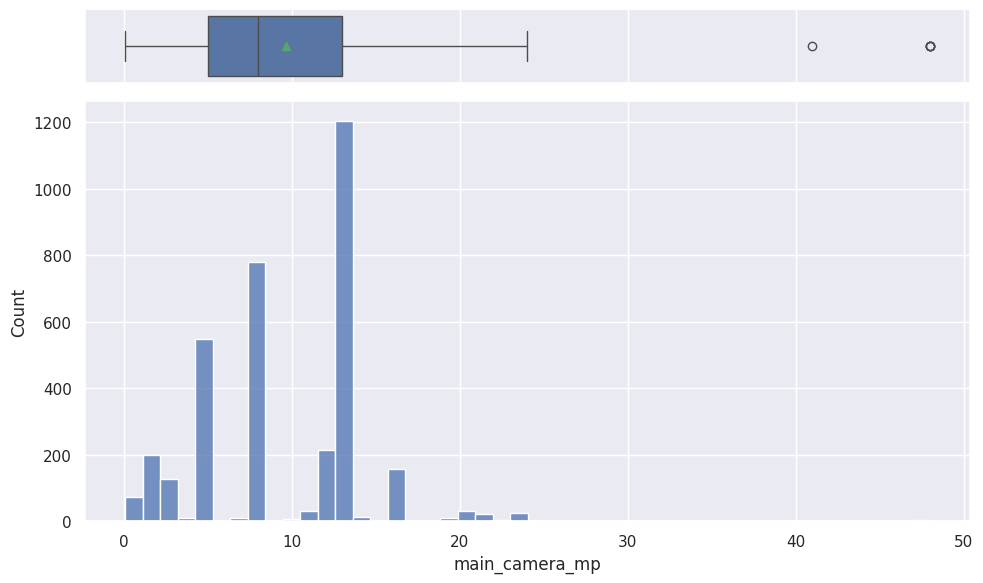

In [ ]:
plot_boxplot_histogram(data1, 'main_camera_mp')

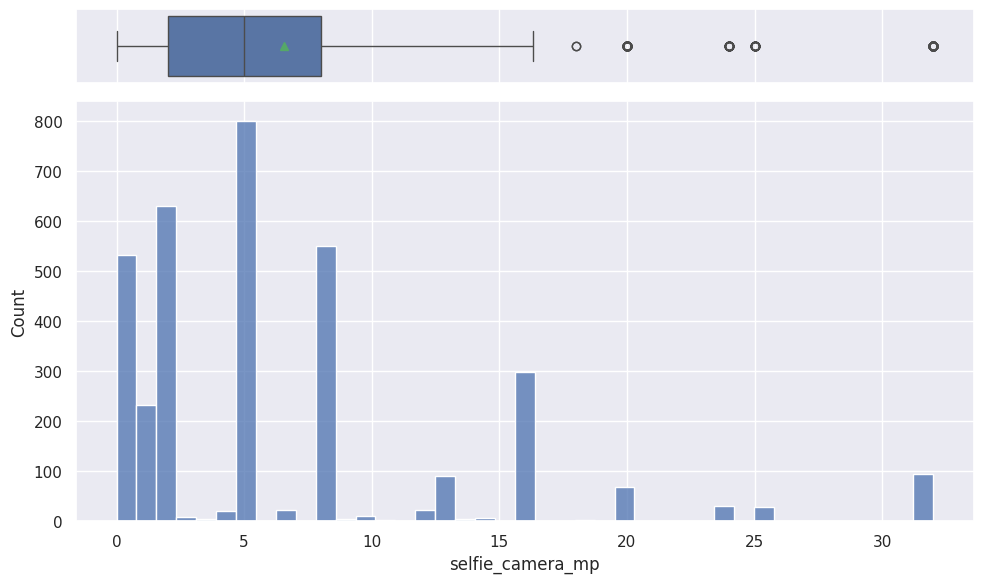

In [ ]:
plot_boxplot_histogram(data1, 'selfie_camera_mp')

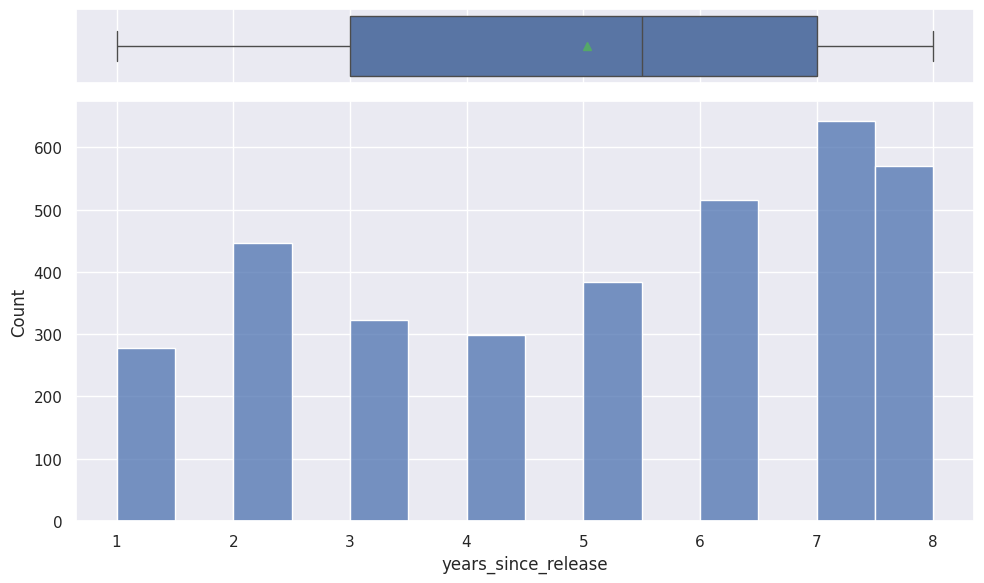

In [ ]:
plot_boxplot_histogram(data1, 'years_since_release')

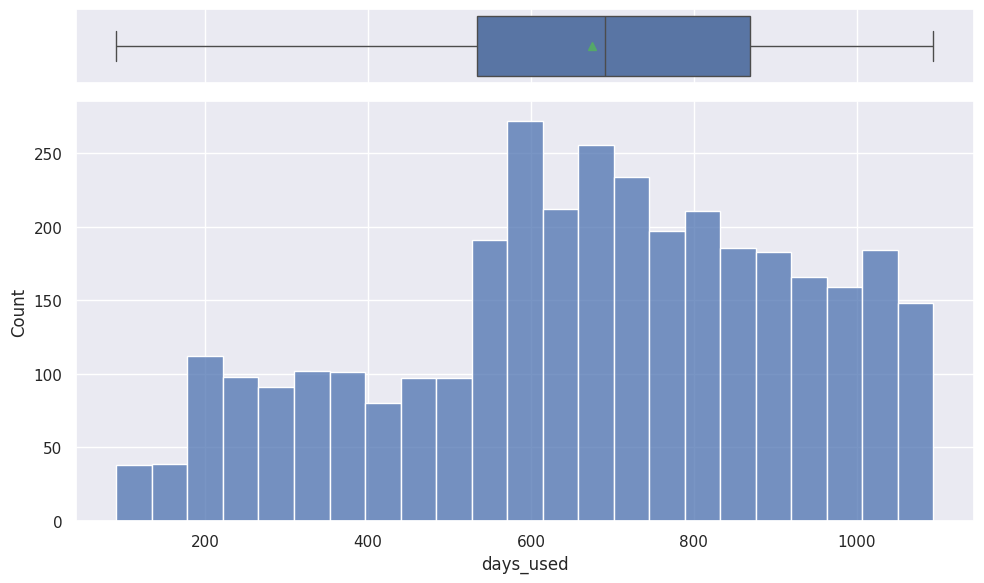

In [ ]:
plot_boxplot_histogram(data1, 'days_used')

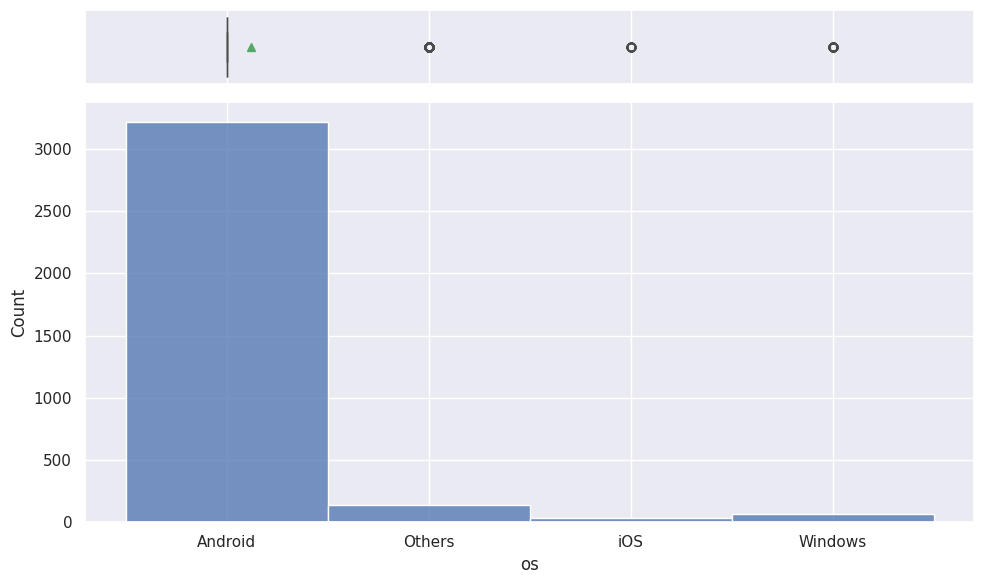

In [ ]:
plot_boxplot_histogram(data1, 'os')

Observation: There appears to be no changes in the features even after the data preprocessing.

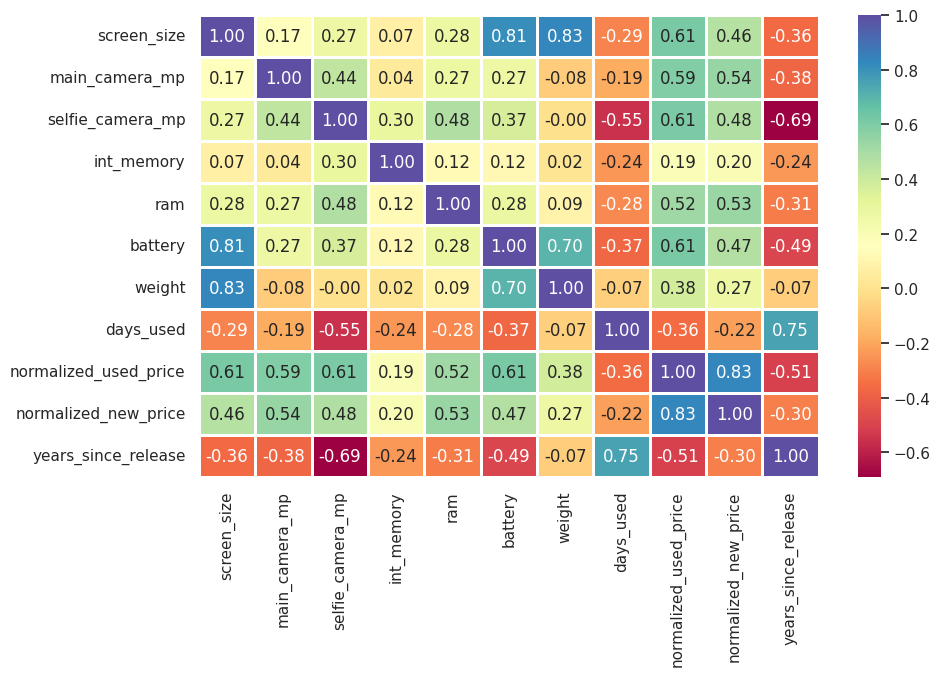

In [ ]:
num_cols3 = data1.select_dtypes(include=np.number).columns.tolist()
numeric_data2 = data1[num_cols3]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data2.corr(), fmt=".2f", annot = True, cmap = 'Spectral', linewidths=2)
plt.show()

* Depreciation: The years since release and days used are negatively correlated with normalized used price, indicating that older and more heavily used phones depreciate more in value.
* Camera Quality: Both the main camera MP and selfie camera MP have strong positive correlations with normalized used price, showing that camera quality is a significant factor in determining a phone's resale value.
* Battery: Battery size, RAM, and screen size are also important factors in determining both new and used phone prices, with larger phones, better performance, and longer battery life contributing to higher values.
* Outdated Models: Older phones are more likely to have lower camera specs (both main and selfie) and lower resale prices, reflecting technological advancements and market demand for newer features.

## Model Building - Linear Regression

In [ ]:
# dependent and independent variables
X = data1.drop('normalized_used_price', axis = 1)
y = data1['normalized_used_price']
print(X.shape)
print(y.shape)

(3454, 14)
(3454,)


In [ ]:
X = sm.add_constant(X)
X.shape

(3454, 15)

* Encode categorical features

In [ ]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X = X.astype(float)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0      127.0              4.715100  ...               0.0   
1   4300.0   213.0      325.0              5.519018  ...               0.0   
2   4200.0   213.0      162.0              5.884631  ...               0.0   
3   7250.0   480.0      345.0              5.630961  ...               0.0   
4   5000.0   185.0      293.0              4.947837  ...               0.0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0              0.0              0.0                0.0             0.0   
1              0.0              0.0                0.0             0.0   
2              0.0              0.0                0.0             0.0   
3              0.0              0.0                0.0             0.0   
4              0.0              0.0                0.0             0.0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0        0.0         0.0     0.0     1.0     0.0  
1        0.0         0.0     0.0     1.0     1.0  
2        0.0         0.0     0.0     1.0     1.0  
3        0.0         0.0     0.0     1.0     1.0  
4        0.0         0.0     0.0     1.0     0.0  

[5 rows x 49 columns]

In [ ]:
X.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'years_since_release', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn',
       'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo',
       'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
       'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus',
       'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
       'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony',
       'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO',
       'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes'

* Splitting data into training and testing data sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print("The number of rows in X_train are", X_train.shape[0])
print("The number of rows in X_test are", X_test.shape[0])

The number of rows in X_train are 2417
The number of rows in X_test are 1037


In [ ]:
import statsmodels.api as sm

In [ ]:
# Fit the OLS model
ols = sm.OLS(y_train, X_train)
ols_model = ols.fit()

# Display the summary of the model
print(ols_model.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           15:50:37   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- Adjusted R squared: It reflects the fit of the model and consider only relevant factors into account, penalize irrelevant ones. Adjusted R-squared values 0.842, indicating that 84.2% of the variance in used price is explained by the model.

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(regressors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = regressors.shape[0]
    k = regressors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, regressors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    regressors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(regressors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(regressors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Training Performance\n")
ols_model_train_perf = model_performance_regression(ols_model, X_train, y_train)
ols_model_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229884  0.180326   0.844886        0.841675  4.326841

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(ols_model, X_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

* Training Adjsuted R square is 0.84, so the model is not underfitting.
* RMSE & MAE on train and test data are almost same which suggests model is not overfitting

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

* We will be checking the following Linear Regression assumptions:

1 No Multicollinearity

2 Linearity of variables

3 Independence of error terms

4 Normality of error terms

5 No Heteroscedasticity


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [ ]:
data1.shape

(3454, 15)

In [ ]:
# lets check the VIF of the regressors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(regressors):
    vif = pd.DataFrame()
    vif["Feature"] = regressors.columns
    vif["VIF"] = [variance_inflation_factor(regressors.values, i) for i in range(len(regressors.columns))]
    return vif

In [ ]:
checking_vif(X_train)

Feature         VIF
0                   const  227.744081
1             screen_size    7.677290
2          main_camera_mp    2.285051
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081780
7                  weight    6.396749
8               days_used    2.660269
9    normalized_new_price    3.119430
10    years_since_release    4.899007
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057668
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951272
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410361
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849832
25        brand_name_Lava    1.711360
26      brand_name_Lenovo    4.558941
27       brand_name_Meizu    2.179607
28    brand_name_Micromax    3.363521
29   brand_name_Microsoft    1.869751
30    brand_name_Motorola    3.274558
31       brand_name_Nokia    3.479849
32     brand_name_OnePlus    1.437034
33        brand_name_Oppo    3.971194
34      brand_name_Others    9.711034
35   brand_name_Panasonic    2.105703
36      brand_name_Realme    1.946812
37     brand_name_Samsung    7.539866
38        brand_name_Sony    2.943161
39       brand_name_Spice    1.688863
40        brand_name_Vivo    3.651437
41        brand_name_XOLO    2.138070
42      brand_name_Xiaomi    3.719689
43         brand_name_ZTE    3.797581
44              os_Others    1.859863
45             os_Windows    1.596034
46                 os_iOS   11.784684
47                 4g_yes    2.467681
48                 5g_yes    1.813900

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

# Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [ ]:
def treating_multicollinearity(regressors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    regressors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = regressors.loc[:, ~regressors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size', 'weight']

In [ ]:
result = treating_multicollinearity(X_train, y_train, col_list)
result

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838381                 0.234703
1       weight                           0.838071                 0.234928

* Weight and Screen Size: Both weight and screen_size appear to have a substantial influence on the model’s performance. Dropping them leads to noticeable decreases in adjusted R-squared and increases in RMSE, meaning they are likely important regressors.

In [ ]:
col_to_drop =  'screen_size'

# Drop the specific column from X_train and X_test
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Checking VIF after dropping the column
vif = checking_vif(X_train2)
print(f"VIF after dropping '{col_to_drop}':\n", vif)

VIF after dropping 'screen_size':
                   Feature         VIF
0                   const  202.673906
1          main_camera_mp    2.281835
2        selfie_camera_mp    2.809009
3              int_memory    1.362043
4                     ram    2.282350
5                 battery    3.842989
6                  weight    2.993855
7               days_used    2.648929
8    normalized_new_price    3.077650
9     years_since_release    4.730315
10     brand_name_Alcatel    3.405533
11       brand_name_Apple   13.000338
12        brand_name_Asus    3.326698
13  brand_name_BlackBerry    1.631042
14      brand_name_Celkon    1.774528
15     brand_name_Coolpad    1.467719
16      brand_name_Gionee    1.941437
17      brand_name_Google    1.319334
18         brand_name_HTC    3.399980
19       brand_name_Honor    3.340354
20      brand_name_Huawei    5.981046
21     brand_name_Infinix    1.283526
22     brand_name_Karbonn    1.573494
23          brand_name_LG    4.832548
24        brand

* Dropping only screen size, multicollinearity disappeared except in constant and dummy variables which are redundant.

In [ ]:
olsmodel_2 = sm.OLS(y_train, X_train2)
olsresult_2 = olsmodel_2.fit()
print(olsresult_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           15:50:39   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* After deleting variable screen size there is almost no change on "Adjusted  R squared" value (0.842-0.838 = 0.004).

* Dealing with high P Values: we will consider dropping p values greater than 0.05 as they are not significant for prediction.
* We will delete P values one by one using a loop  

In [ ]:
# initial list of columns
regressors = X_train2.copy()
cols = regressors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = regressors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [ ]:
print(X_train3.shape)
print(X_test3.shape)

(2417, 15)
(1037, 15)


In [ ]:
olsmodel_3 = sm.OLS(y_train, X_train3)
olsresult_3 = olsmodel_3.fit()
print(olsresult_3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           15:50:40   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# model performance on train set
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsresult_3, X_train3, y_train)
olsmodel3_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [ ]:
# model performance on test set
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(olsresult_3, X_test3, y_test)
olsmodel3_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

* Observations: The P-values of features above p>0.05 have been removed. It has not affected the linear model as our Adjusted R Square still almost same (0.838)

### Test for Linearity and Independence

In [ ]:
### Test for Linearity
# dataframe with actual, fitted and residual values
data_pred = pd.DataFrame()
data_pred['actual_values'] = y_train
data_pred['fitted_values'] = olsresult_3.fittedvalues
data_pred['residuals'] = olsresult_3.resid
data_pred.head()

actual_values  fitted_values  residuals
3026       4.087488       3.867319   0.220169
1525       4.448399       4.602001  -0.153602
1128       4.315353       4.286957   0.028395
3003       4.282068       4.195169   0.086899
2907       4.456438       4.490563  -0.034125

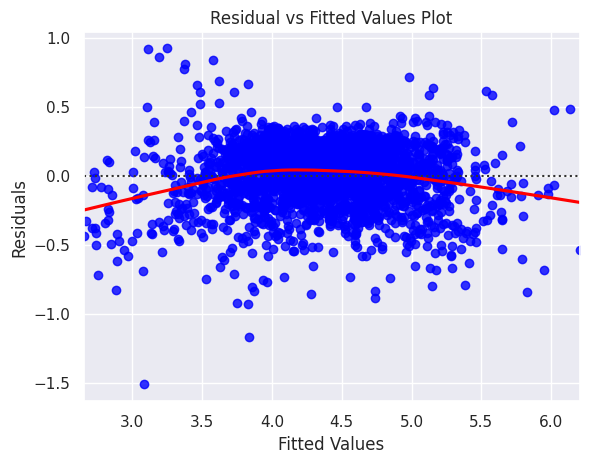

In [ ]:
sns.residplot(data=data_pred, x='fitted_values', y='residuals', color  = 'blue', lowess = True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Values Plot')
plt.show()

Observation: There is no pattern from the residuals and fitted values meaning the assumptions of linearity and independence are satisfied.

### Test for Normality

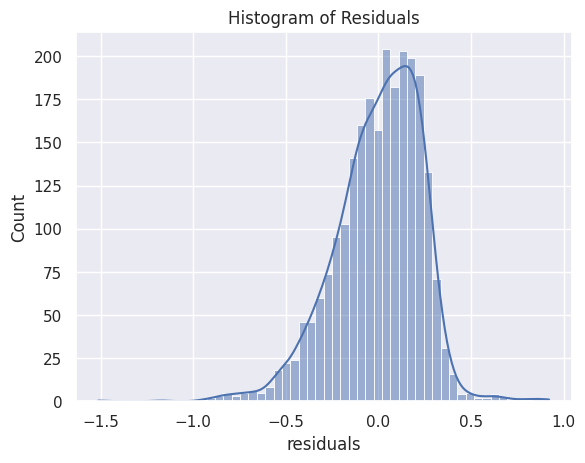

In [ ]:
sns.histplot(data_pred['residuals'], kde = True)
plt.title('Histogram of Residuals')
plt.show()

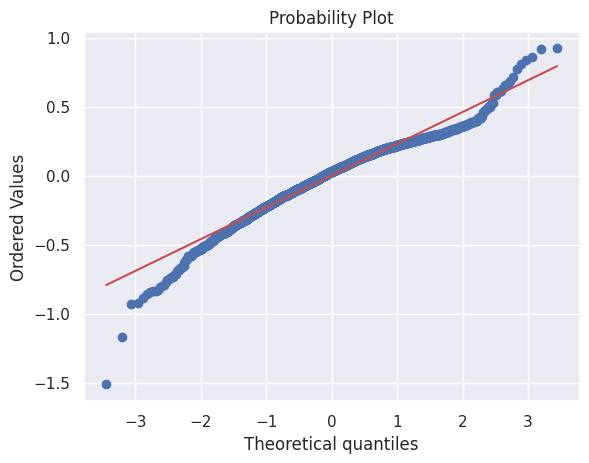

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(data_pred['residuals'], dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(data_pred['residuals'])

ShapiroResult(statistic=0.9676950829900581, pvalue=6.983856712618473e-23)

Observation: According to the Shapiro test the p-value is less than .05 meaning the residuals are not normal. However the probability plot is mostly linear except the tails and the residual histplot does look normal but skewed to the left. So we can accept it normal distribution.

### Test for Homoscedasticity

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(data_pred['residuals'], X_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

Observation: P-value is above .05 so the variance of the residuals is symmetrically distributed across the regression line, the data is homoscedacitic in nature.

### Prediction on Test Data

In [ ]:
olsmodel_3 = sm.OLS(y_train, X_train3).fit()
pred = olsmodel_3.predict(X_test3)

In [ ]:
data_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
data_pred_test.sample(10, random_state = 1)

Actual  Predicted
1995  4.566741   4.385671
2341  3.696103   4.003934
1913  3.592093   3.643812
688   4.306495   4.103463
650   4.522115   5.113026
2291  4.259294   4.398406
40    4.997685   5.459871
1884  3.875359   4.053143
2538  4.206631   4.035868
45    5.380450   5.227899

Observation: The actual values and predicted values are almost similar.

## Final Model

In [ ]:
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

In [ ]:
print(type(X_train_final))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
X_train3.head()

const  main_camera_mp  selfie_camera_mp  ram  weight  \
3026    1.0             8.0               0.3  4.0   120.0   
1525    1.0            13.0               5.0  4.0   225.0   
1128    1.0            13.0               5.0  4.0   162.0   
3003    1.0             8.0               5.0  4.0   126.0   
2907    1.0            13.0              16.0  4.0   160.0   

      normalized_new_price  years_since_release  brand_name_Karbonn  \
3026              4.796204                  7.0                 0.0   
1525              5.434595                  5.0                 0.0   
1128              5.137914                  6.0                 0.0   
3003              5.189228                  6.0                 0.0   
2907              5.016220                  4.0                 0.0   

      brand_name_Samsung  brand_name_Sony  brand_name_Xiaomi  os_Others  \
3026                 0.0              0.0                0.0        0.0   
1525                 0.0              0.0                0.0        0.0   
1128                 0.0              0.0                0.0        0.0   
3003                 0.0              0.0                0.0        0.0   
2907                 0.0              0.0                0.0        0.0   

      os_iOS  4g_yes  5g_yes  
3026     0.0     0.0     0.0  
1525     0.0     1.0     0.0  
1128     0.0     0.0     0.0  
3003     0.0     1.0     0.0  
2907     0.0     1.0     0.0

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train_final)
olsresult_final = olsmodel_final.fit()
print(olsresult_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           15:50:42   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)

print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsresult_final, X_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [ ]:
# checking model performance on train set (seen 30% data)

print("Testing Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsresult_final, X_test_final, y_test
)
olsmodel_final_train_perf

Testing Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

Observations:
1. Model is able to explain about 83.9% variance in the data with 4.39% error rate, indicates no underfitting.
2. Training and testing MAE, RMSE are low and comparable, indicates no overfitting.
3. The MAPE on the test set indicates that, on average, the model's predictions are within 4.39% of the actual normalized used price.

* Hence we can understand model "olsmodel_final" is good to go for prediction and inferences.

## Actionable Insights and Recommendations

Actionable Insights:
1. Final Model is able to explain about 83.8% variance in the data with 4.39% error rate, indicates no underfitting, can be used to predict normalized used devices prices multiplied by coeffs.
* Positive Coefficients: Variables like main_camera_mp (0.0210), ram (0.0207), and normalized_new_price (0.4415), brand name Karbonn and Xiomi suggest that increases in these values lead to higher used prices.
* Negative Coefficients: Variables like years_since_release (-0.0292) and brand_name_Samsung (-0.0374), sony and samsung have negative coefficients, meaning they decrease the used price.
2. Both the main camera MP and selfie camera MP have strong positive correlations with normalized used price, showing that camera quality is a significant factor in determining a phone's resale value.
3. Older and more heavily used phones depreciate more in value.
4. Battery size, RAM, and screen size are also important factors in determining both new and used phone prices, with larger phones, better performance, and longer battery life contributing to higher values.
5. Older phones are more likely to have lower camera specs (both main and selfie) and lower resale prices, reflecting technological advancements and market demand for newer features.

Recommendations:
1. Focus on Price Sensitivity: To remain competitive in the used phone market, companies can monitor new phone pricing trends and adjust used phone prices accordingly.
2. Resellers should adopt pricing strategies that account for depreciation and offer attractive discounts on older models to move inventory more quickly.
3. Camera Quality: Recell market should consider better quality cameras as they retain resale value. Sellers can start marketing strategies to attarct buyers looking for better cameras.
4. Brand Name: Popular brand names like Huawei should be more in market as they retain good resale price and are in better demand than others.
5. Battery size, RAM and screeen size can also be considered as relevant factors for resale.


___